<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=GGjgltpbX0J78WTjOKGK6vIeKG3pDuR4s9R6gziOI64'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

In [2]:
!pip install git+https://github.com/CBravoR/scorecardpy
# !pip uninstall scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-6mz091u0
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-6mz091u0
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=9916f3109abb4dc40dd0659b5caef8ba1f12d29ef2de141c80ee471f0ca9c177
  Stored in directory: /tmp/pip-ephem-wheel-cache-t90igv1c/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [4]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


## TO be added in Data Cleaning

In [5]:
# To have everything except id
# df = df.iloc[:,1:]
# df = df.drop(columns = ['funded_amnt', 'funded_amnt_inv'])

# df['mths_since_recent_inq'][df['mths_since_recent_inq'] == 0] = 0.5
# df['mths_since_recent_inq'] = 1/df['mths_since_recent_inq']
# df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(0)

In [6]:

# train, test = sc.split_df(df.iloc[:,1:],
#                           y = 'Default',
#                           ratio = 0.7,
#                           seed = 251256517).values()

In [5]:
# train.to_csv('Train.csv')
# test.to_csv('Test.csv')
train = pd.read_csv("train_mean.csv", low_memory=False, index_col=0)
# test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [6]:
train['Default']

0          0
1          0
5          0
6          1
8          0
          ..
1280640    1
1280641    0
1280643    0
1280644    1
1280645    0
Name: Default, Length: 896430, dtype: int64

In [7]:
train_last_19 = train.iloc[:, 38:]
train_last_19.columns

Index(['inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'Default', 'bank_dlq', 'il_acc', 'payment_history',
       'collateral_coverage_ratio'],
      dtype='object')

In [8]:
train_last_19.dtypes

inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    float64
bc_util                           float64
chargeoff_within_12_mths          float64
mo_sin_old_il_acct                float64
mo_sin_old_rev_tl_op              float64
mo_sin_rcnt_rev_tl_op             float64
mo_sin_rcnt_tl                    float64
mort_acc                          float64
mths_since_recent_bc              float64
mths_since_recent_inq             float64
mths_since_recent_revol_delinq    float64
num_accts_ever_120_pd             float64
num_actv_bc_tl                    float64
num_actv_rev_tl                   float64
num_bc_sats                       float64
num_bc_tl                         float64
num_il_tl                         float64
num_op_rev_tl                     float64
num_rev_accts                     float64
num_rev_tl_bal_gt_0               float64
num_sats                          

In [9]:
# def outlier_analysis(df):
#     df.loc[df["inq_last_12m"]>13,"inq_last_12m"] = 13
#     df.loc[df["acc_open_past_24mths"]>19,"acc_open_past_24mths"] = 19
#     df.loc[df["avg_cur_bal"]>110000,"avg_cur_bal"] = 110000
#     df.loc[df["bc_open_to_buy"]>110000,"bc_open_to_buy"] = 110000
#     df.loc[df["bc_util"]>120,"bc_util"] = 120
#     df.loc[df["chargeoff_within_12_mths"]>1,"chargeoff_within_12_mths"] = 1
#     df.loc[df["mo_sin_old_il_acct"]>350,"mo_sin_old_il_acct"] = 350
#     df.loc[df["mo_sin_rcnt_rev_tl_op"]>110,"mo_sin_rcnt_rev_tl_op"] = 110
#     df.loc[df["mo_sin_rcnt_tl"]>60,"mo_sin_rcnt_tl"] = 60
#     df.loc[df["mort_acc"]>11,"mort_acc"] = 11
#     df.loc[df["mths_since_recent_bc"]>190,"mths_since_recent_bc"] = 190
#     df.loc[df["mths_since_recent_revol_delinq"]>80,"mths_since_recent_revol_delinq"] = 80
#     df.loc[df["num_accts_ever_120_pd"]>8,"num_accts_ever_120_pd"] = 8
#     df.loc[df["num_actv_bc_tl"]>15,"num_actv_bc_tl"] = 15
#     df.loc[df["num_actv_rev_tl"]>22,"num_actv_rev_tl"] = 22
#     df.loc[df["num_bc_sats"]>19,"num_bc_sats"] = 19
#     df.loc[df["num_bc_tl"]>30,"num_bc_tl"] = 30
#     df.loc[df["num_il_tl"]>50,"num_il_tl"] = 50
#     df.loc[df["num_op_rev_tl"]>35,"num_op_rev_tl"] = 35

#     df.loc[df["num_rev_accts"]>60,"num_rev_accts"] = 60
#     df.loc[df["num_rev_tl_bal_gt_0"]>30,"num_rev_tl_bal_gt_0"] = 30
#     df.loc[df["num_sats"]>40,"num_sats"] = 40
#     df.loc[df["pct_tl_nvr_dlq"]<50,"pct_tl_nvr_dlq"] = 50
#     df.loc[df["pub_rec_bankruptcies"]>2,"pub_rec_bankruptcies"] = 2
#     df.loc[df["tax_liens"]>15,"tax_liens"] = 15
#     df.loc[df["tot_hi_cred_lim"]>0.18e+7,"tot_hi_cred_lim"] = 0.18e+7
#     df.loc[df["total_bal_ex_mort"]>0.6e+6,"total_bal_ex_mort"] = 0.6e+6
#     df.loc[df["total_bc_limit"]>200000,"total_bc_limit"] = 200000
#     df.loc[df["total_il_high_credit_limit"]>0.4e+6,"total_il_high_credit_limit"] = 0.4e+6
#     # df.loc[df["coborrower_inc"]>0.2e+6,"coborrower_inc"] = 0.2e+6
#     df.loc[df["payment_history"]<-0.3,"payment_history"] = -0.3
#     df.loc[df["collateral_coverage_ratio"]>50,"collateral_coverage_ratio"] = 50

#     return df

In [14]:
# after_outliers = outlier_analysis(train_last_19)
# num_list = []
# for col_id in train_last_19.columns[:-1]:
#   if train_last_19[col_id].dtype == "float64":
#     num_list.append(col_id)
#     fig, g = plt.subplots(2,1, figsize=(10,6))
#     sns.kdeplot(data = train_last_19, x = col_id, hue= "Default", alpha=0.7, ax=g[0])
#     ymin, ymax = g[0].get_ylim()
#     g[0].set_ylim(ymin=ymin-(ymax/100), ymax=ymax)
#     sns.boxplot(data = train_last_19, x = col_id, ax=g[1])

In [15]:
# sns.set(color_codes=True)

# for col_id in train_last_19.columns:
#     sns.displot(data = train_last_19, x = col_id, hue = "Default", kind = 'kde')

In [10]:
# after_outliers = outlier_analysis(train_last_19.copy())

In [17]:
# train['num_rev_accts']

In [18]:
# train_last_19 = train.iloc[:, 38:] #.drop(columns=['num_rev_accts', 'percent_bc_gt_75'])
# train_last_19['Default'] = train['Default']
# train_last_19[]
# bins = []
# for column in train_last_19.columns:
#     temp = train_last_19[column].to_frame()
#     temp['Default'] = train['Default']
# bins = sc.woebin(train_last_19, y = 'Default', 
#                 min_perc_fine_bin=0.01, # How many bins to cut initially into
#                 min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
#                 stop_limit=0.02, # Minimum information value 
#                 max_num_bin=10, # Maximum number of bins
#                 method='tree'
#                 )
        

#Vishal's Variables

In [29]:
# first_20_vars = ['loan_amnt', 'term', 'installment', 'home_ownership',  
#                  'purpose', 'dti', 
#                  'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 
#                  'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

# def preprocess_data(df):
#     # Convert non-numeric columns to string
#     non_numeric_cols = df.select_dtypes(include=['object']).columns
#     df[non_numeric_cols] = df[non_numeric_cols].astype('str')

#     # Convert numeric columns to float and replace NaNs with a suitable value
#     numeric_cols = df.select_dtypes(include=[np.number]).columns
#     df[numeric_cols] = df[numeric_cols].astype('float64')
#     df[numeric_cols] = df[numeric_cols].fillna(-999999)

#     return df

# df_train_preprocessed = preprocess_data(train.copy())

In [30]:
def remove_outliers(data):

    df = data.copy()
    df.loc[df["installment"]>1650,"installment"] = 1650
    df.loc[df["dti"]>900,"dti"] = 900
    df.loc[df["delinq_2yrs"]>30,"delinq_2yrs"] = 30
    df.loc[df["open_acc"]>75,"open_acc"] = 75
    df.loc[df["pub_rec"]>40,"pub_rec"] = 40
    df.loc[df["revol_bal"]>1500000,"revol_bal"] = 1500000


    df.loc[df["revol_util"]>200,"revol_util"] = 200
    df.loc[df["total_acc"]>125,"total_acc"] = 125
    df.loc[df["annual_inc_joint"]>500000,"annual_inc_joint"] = 500000
    df.loc[df["dti_joint"]>40,"dti_joint"] = 40
    df.loc[df["tot_coll_amt"]>500000,"tot_coll_amt"] = 500000
    df.loc[df["tot_cur_bal"]>1000000,"tot_cur_bal"] = 1000000
    df.loc[df["open_acc_6m"]>10,"open_acc_6m"] = 10
    df.loc[df["open_act_il"]>40,"open_act_il"] = 40
    df.loc[df["open_il_12m"]>10,"open_il_12m"] = 10
    df.loc[df["open_il_24m"]>20,"open_il_24m"] = 20
    df.loc[df["total_bal_il"]>800000,"total_bal_il"] = 800000
    df.loc[df["il_util"]>400,"il_util"] = 400
    df.loc[df["open_rv_12m"]>10,"open_rv_12m"] = 10
    df.loc[df["open_rv_24m"]>20,"open_rv_24m"] = 20
    df.loc[df["max_bal_bc"]>150000,"max_bal_bc"] = 150000
    df.loc[df["all_util"]>200,"all_util"] = 200
    df.loc[df["inq_fi"]>15,"inq_fi"] = 15 
    df.loc[df["total_cu_tl"]>40,"total_cu_tl"] = 40


    df.loc[df["inq_last_12m"]>13,"inq_last_12m"] = 13
    df.loc[df["acc_open_past_24mths"]>19,"acc_open_past_24mths"] = 19
    df.loc[df["avg_cur_bal"]>110000,"avg_cur_bal"] = 110000
    df.loc[df["bc_open_to_buy"]>110000,"bc_open_to_buy"] = 110000
    df.loc[df["bc_util"]>120,"bc_util"] = 120
    df.loc[df["chargeoff_within_12_mths"]>1,"chargeoff_within_12_mths"] = 1
    df.loc[df["mo_sin_old_il_acct"]>350,"mo_sin_old_il_acct"] = 350
    df.loc[df["mo_sin_rcnt_rev_tl_op"]>110,"mo_sin_rcnt_rev_tl_op"] = 110
    df.loc[df["mo_sin_rcnt_tl"]>60,"mo_sin_rcnt_tl"] = 60
    df.loc[df["mort_acc"]>11,"mort_acc"] = 11
    df.loc[df["mths_since_recent_bc"]>190,"mths_since_recent_bc"] = 190
    df.loc[df["mths_since_recent_revol_delinq"]>80,"mths_since_recent_revol_delinq"] = 80
    df.loc[df["num_accts_ever_120_pd"]>8,"num_accts_ever_120_pd"] = 8
    df.loc[df["num_actv_bc_tl"]>15,"num_actv_bc_tl"] = 15
    df.loc[df["num_actv_rev_tl"]>22,"num_actv_rev_tl"] = 22
    df.loc[df["num_bc_sats"]>19,"num_bc_sats"] = 19
    df.loc[df["num_bc_tl"]>30,"num_bc_tl"] = 30
    df.loc[df["num_il_tl"]>50,"num_il_tl"] = 50
    df.loc[df["num_op_rev_tl"]>35,"num_op_rev_tl"] = 35

    df.loc[df["num_rev_accts"]>60,"num_rev_accts"] = 60
    df.loc[df["num_rev_tl_bal_gt_0"]>30,"num_rev_tl_bal_gt_0"] = 30
    df.loc[df["num_sats"]>40,"num_sats"] = 40
    df.loc[df["pct_tl_nvr_dlq"]<50,"pct_tl_nvr_dlq"] = 50
    df.loc[df["pub_rec_bankruptcies"]>2,"pub_rec_bankruptcies"] = 2
    df.loc[df["tax_liens"]>15,"tax_liens"] = 15
    df.loc[df["tot_hi_cred_lim"]>0.18e+7,"tot_hi_cred_lim"] = 0.18e+7
    df.loc[df["total_bal_ex_mort"]>0.6e+6,"total_bal_ex_mort"] = 0.6e+6
    df.loc[df["total_bc_limit"]>200000,"total_bc_limit"] = 200000
    df.loc[df["total_il_high_credit_limit"]>0.4e+6,"total_il_high_credit_limit"] = 0.4e+6
    # df.loc[df["coborrower_inc"]>0.2e+6,"coborrower_inc"] = 0.2e+6
    df.loc[df["payment_history"]<-0.3,"payment_history"] = -0.3
    df.loc[df["collateral_coverage_ratio"]>50,"collateral_coverage_ratio"] = 50
    return df




# Remove the outliers
df_train_no_outliers = remove_outliers(train)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sc.woebin_plot(bins)

In [20]:
# train_last_19

In [12]:
bins = sc.woebin(after_outliers.drop(['chargeoff_within_12_mths'], axis = 1), y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=10, # Maximum number of bins
                method='tree'
                )

[INFO] creating woe binning ...
Binning on 896430 rows and 36 columns in 00:05:09


/usr/local/lib/python3.9/dist-packages/scorecardpy/woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


{'avg_cur_bal': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 640x480 with 2 Axes>,
 'bc_open_to_buy': <Figure size 640x480 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 640x480 with 2 Axes>,
 'collateral_coverage_ratio': <Figure size 640x480 with 2 Axes>,
 'pct_tl_nvr_dlq': <Figure size 640x480 with 2 Axes>,
 'num_bc_sats': <Figure size 640x480 with 2 Axes>,
 'bc_util': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 640x480 with 2 Axes>,
 'total_il_high_credit_limit': <Figure size 640x480 with 2 Axes>,
 'inq_last_12m': <Figure size 640x480 with 2 Axes>,
 'num_il_tl': <Figure size 640x480 with 2 Axes>,
 'num_bc_tl': <Figure size 640x480 with 2 Axes>,
 'num_rev_accts': <Figure size 640x480 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_revol_delinq': <Figure size 640x480 with 2 Axes>,
 'percent_bc_gt_75': <Figure size 640x480 with 2 Axes>,
 'num_op_rev_tl': <Figure size 640x480 with

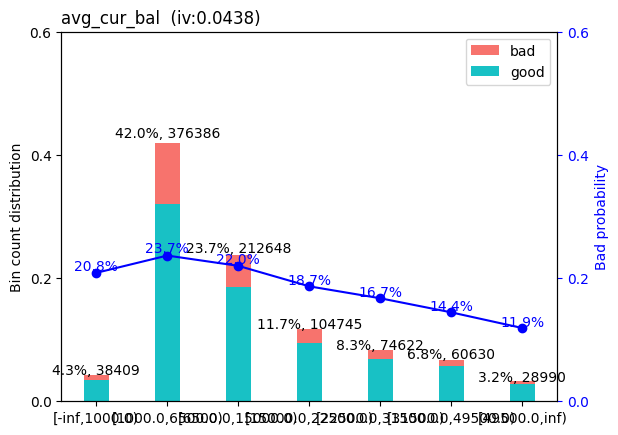

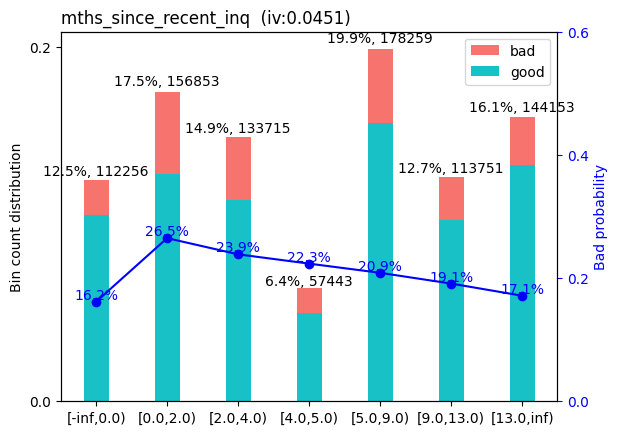

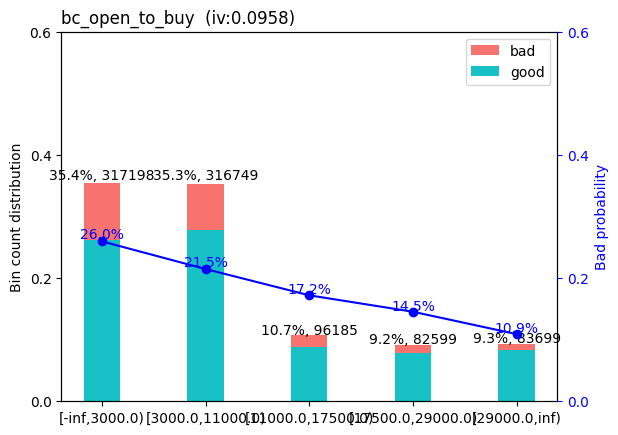

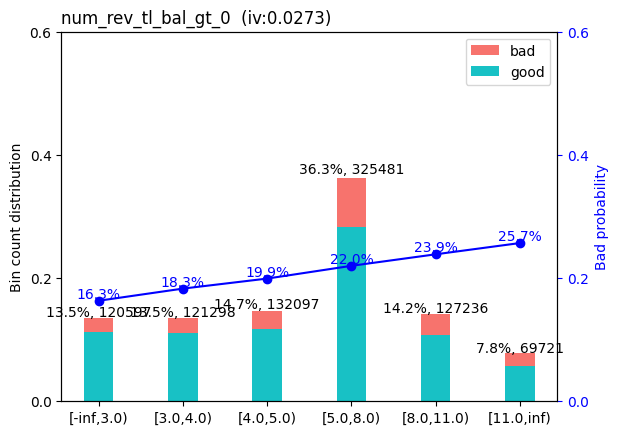

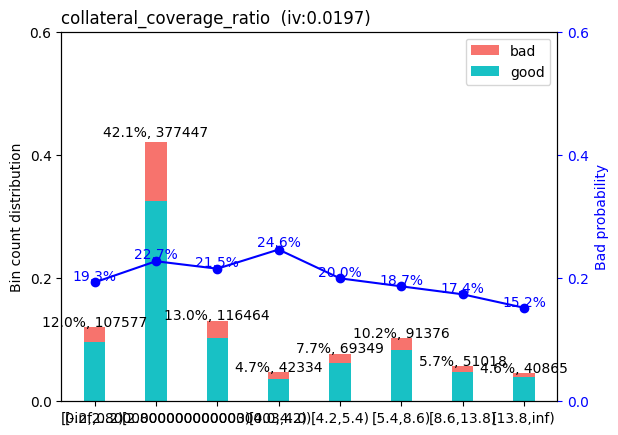

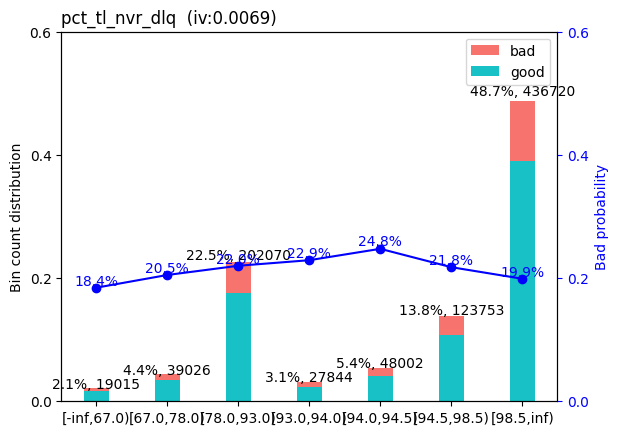

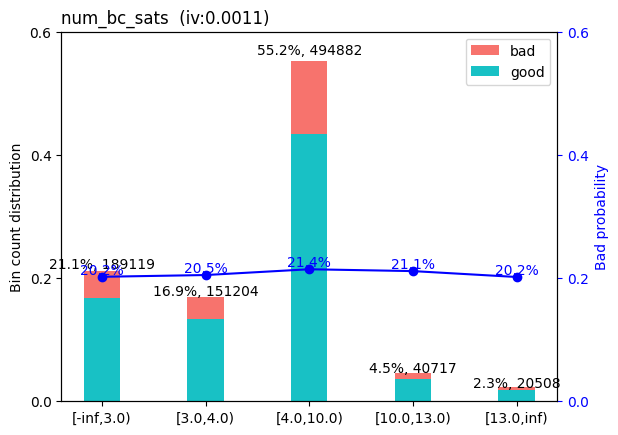

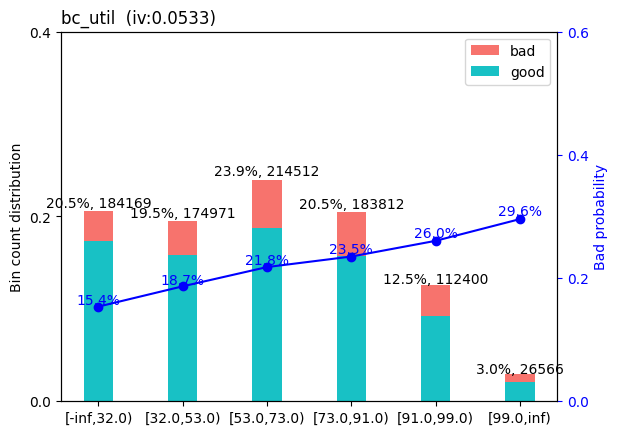

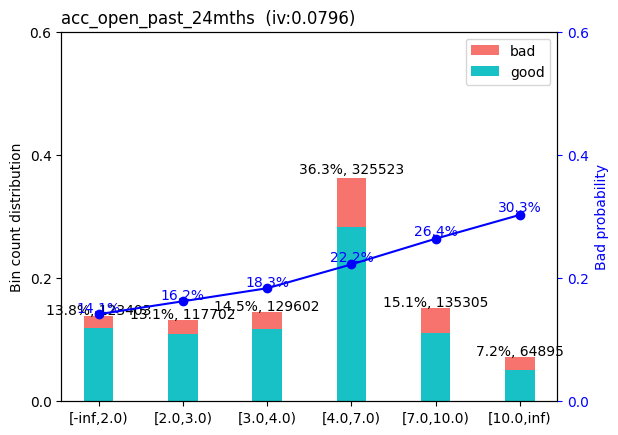

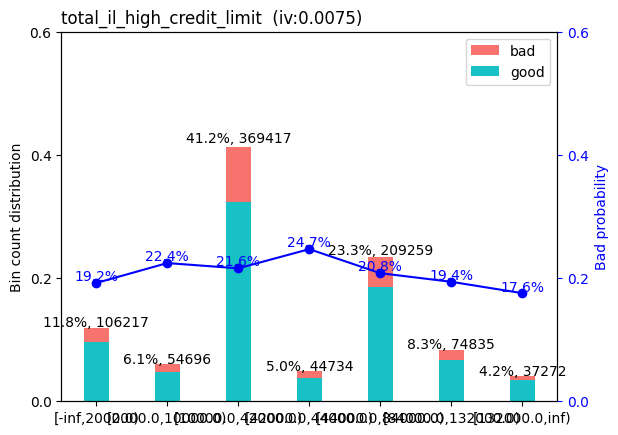

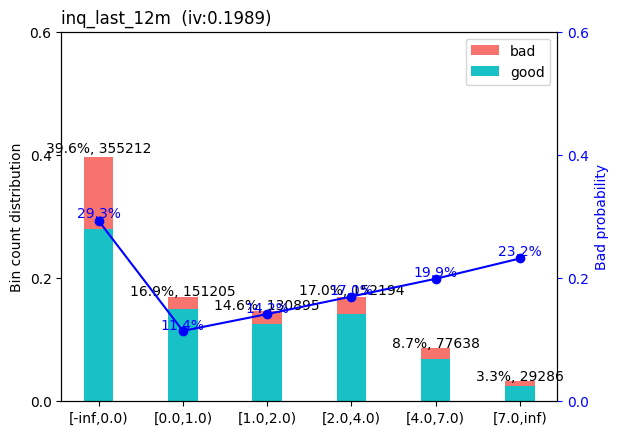

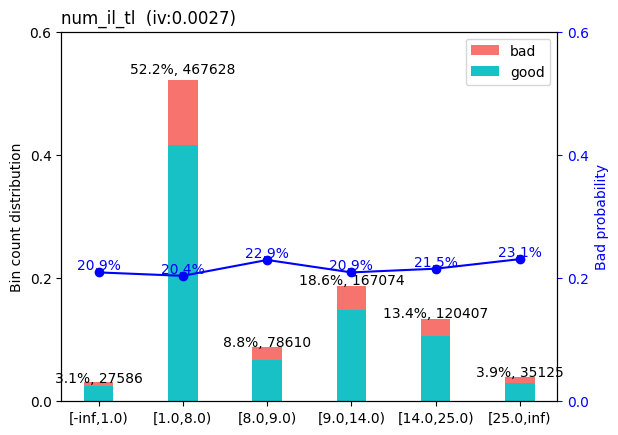

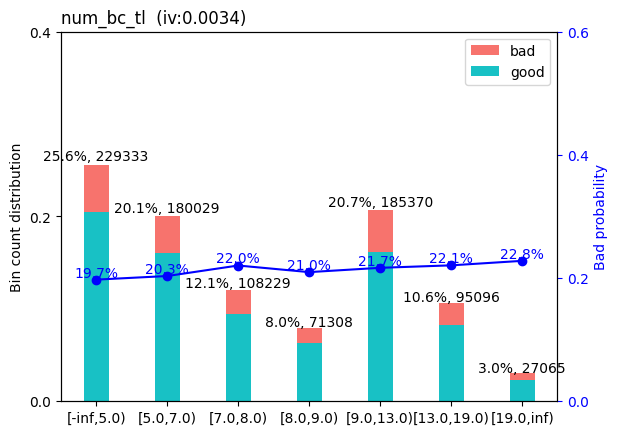

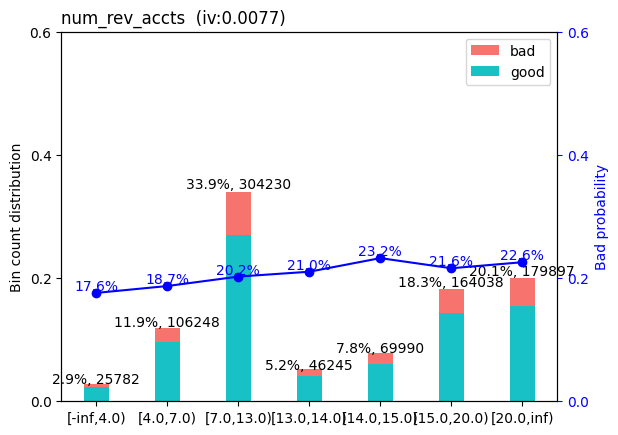

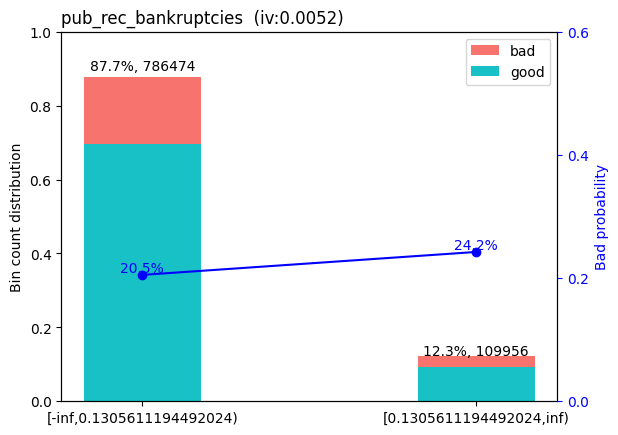

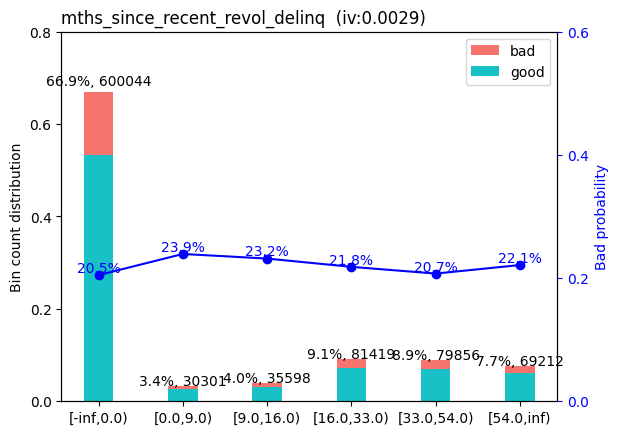

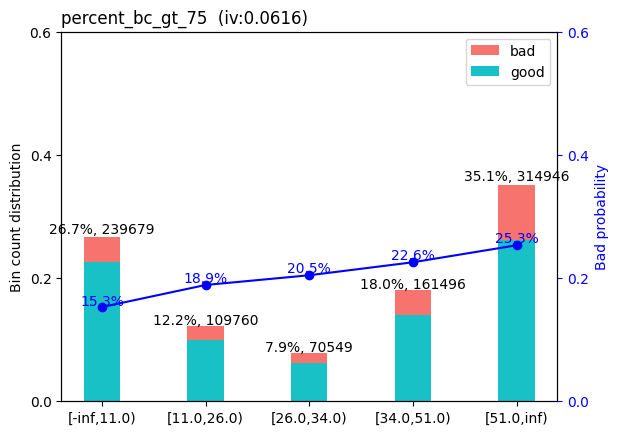

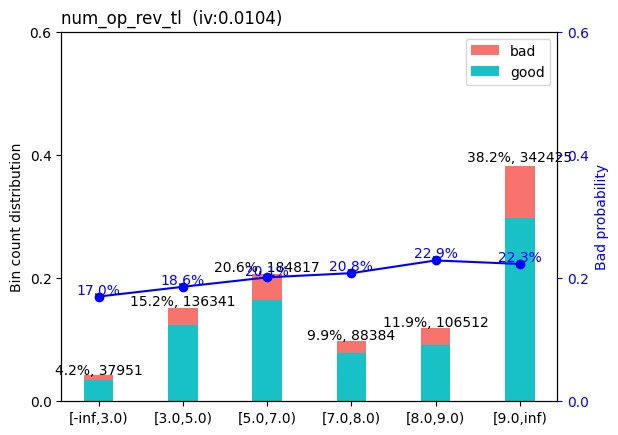

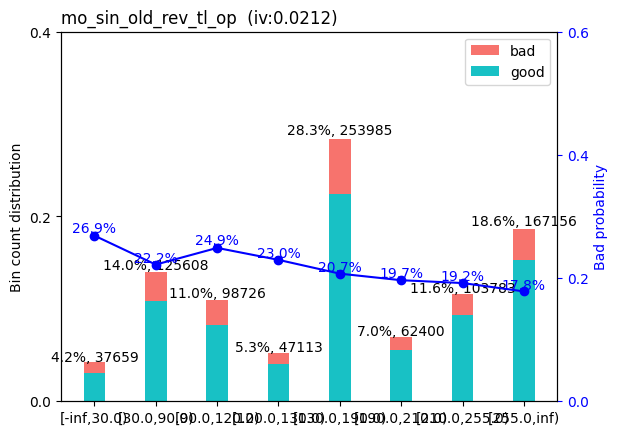

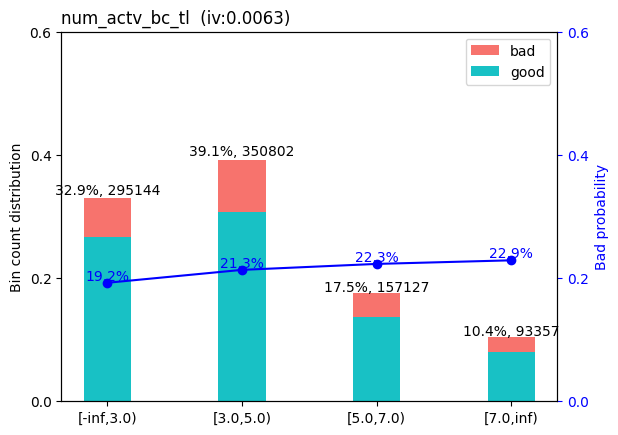

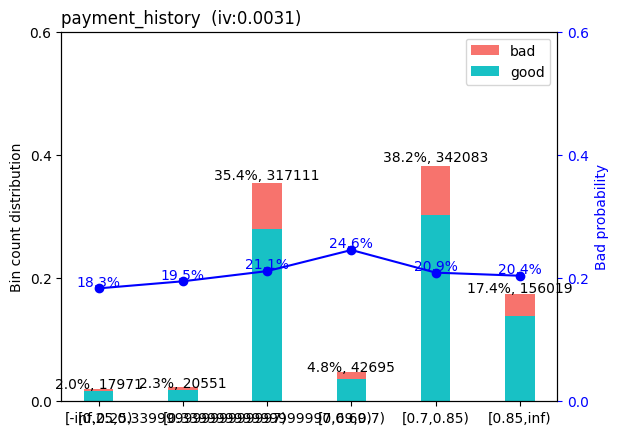

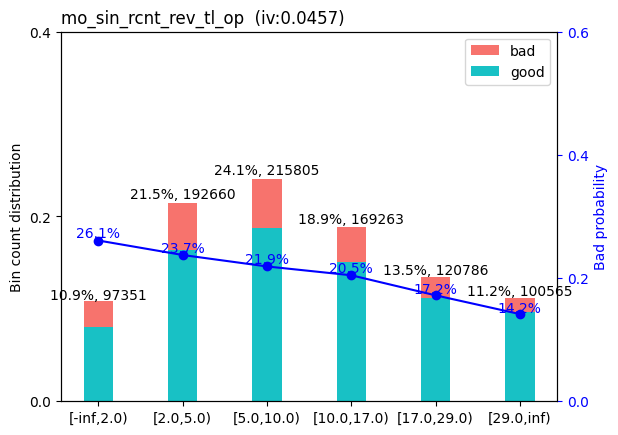

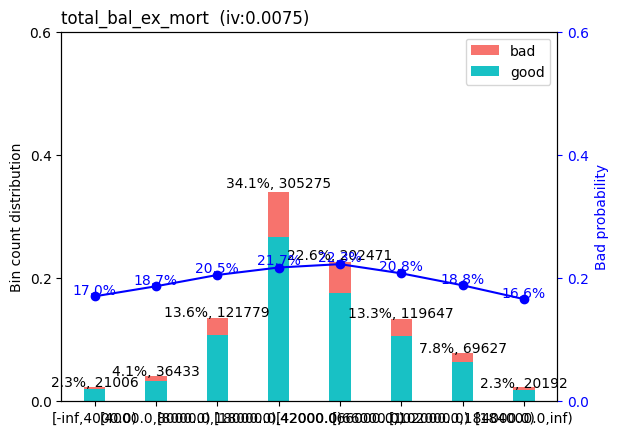

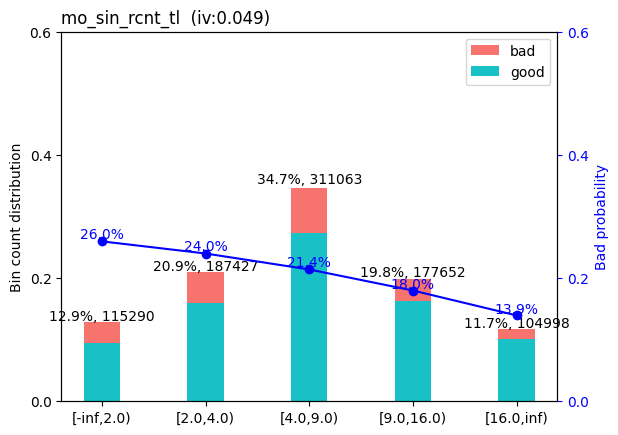

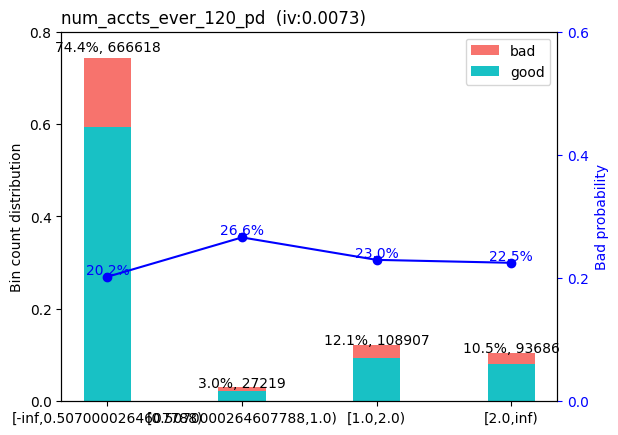

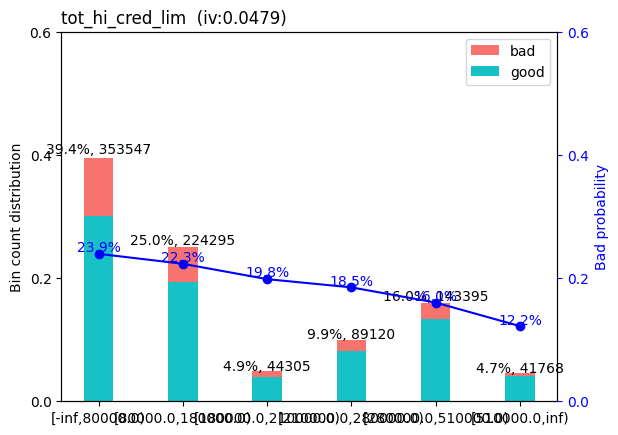

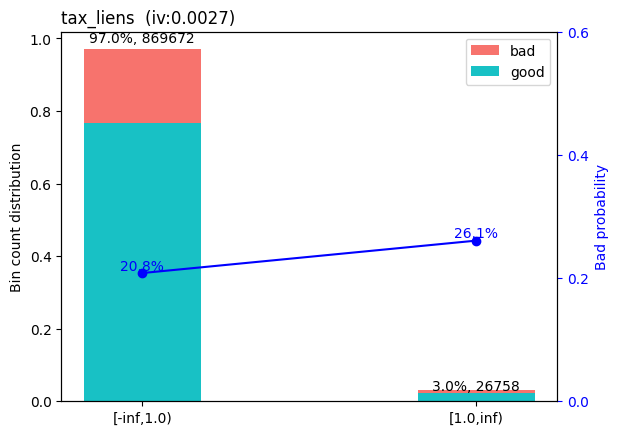

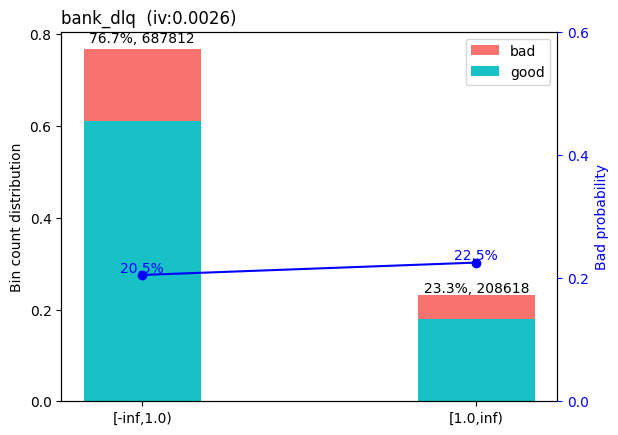

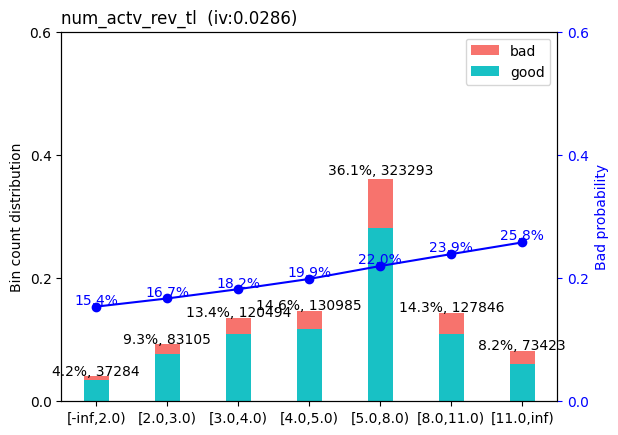

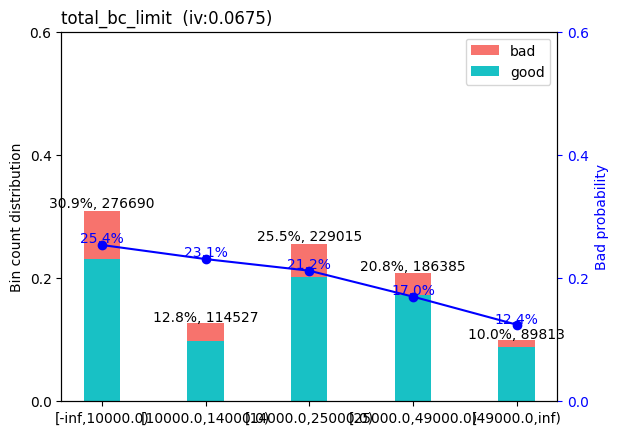

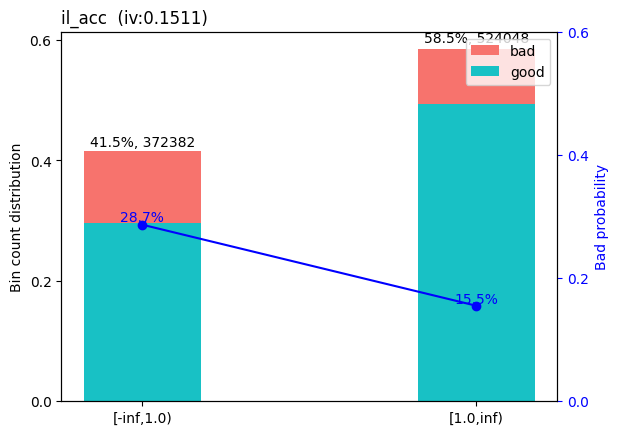

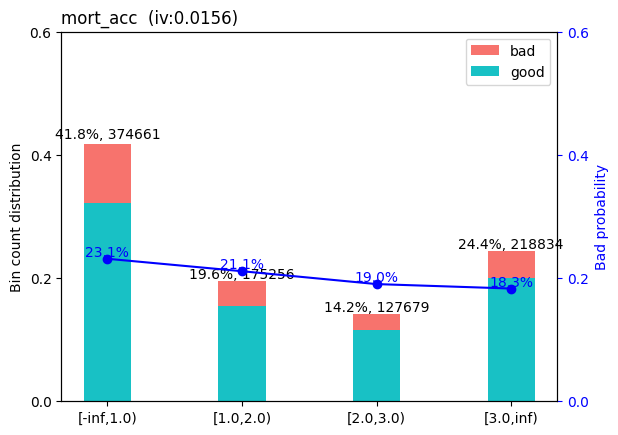

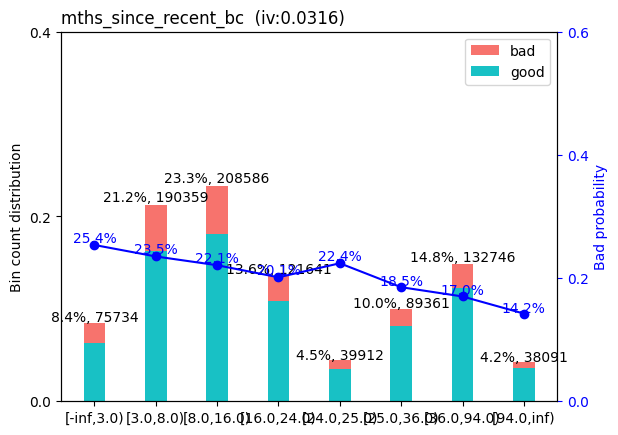

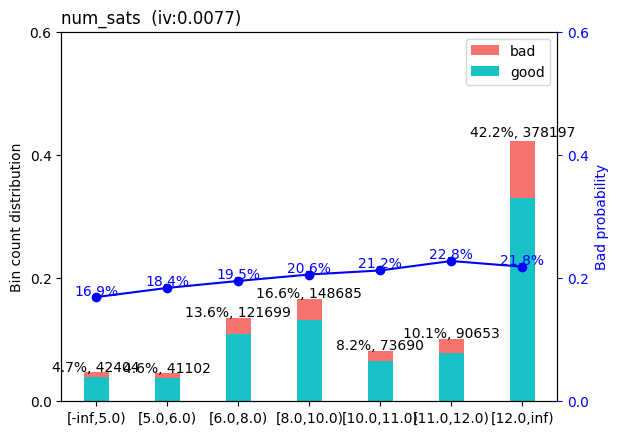

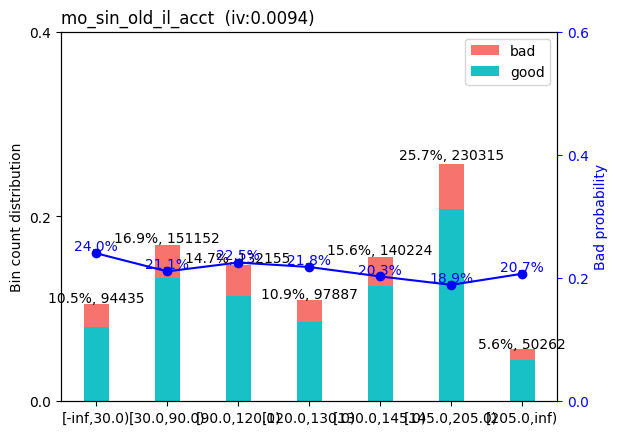

In [13]:
sc.woebin_plot(bins)

In [14]:
bins

{'avg_cur_bal':       variable                bin   count  count_distr    good    bad  \
 0  avg_cur_bal      [-inf,1000.0)   38409     0.042847   30401   8008   
 1  avg_cur_bal    [1000.0,6500.0)  376386     0.419872  287347  89039   
 2  avg_cur_bal   [6500.0,15000.0)  212648     0.237217  165895  46753   
 3  avg_cur_bal  [15000.0,22500.0)  104745     0.116847   85202  19543   
 4  avg_cur_bal  [22500.0,31500.0)   74622     0.083244   62144  12478   
 5  avg_cur_bal  [31500.0,49500.0)   60630     0.067635   51879   8751   
 6  avg_cur_bal      [49500.0,inf)   28990     0.032339   25543   3447   
 
     badprob       woe    bin_iv  total_iv   breaks  is_special_values  
 0  0.208493 -0.007553  0.000002   0.04382   1000.0              False  
 1  0.236563  0.154865  0.010522   0.04382   6500.0              False  
 2  0.219861  0.060005  0.000869   0.04382  15000.0              False  
 3  0.186577 -0.145926  0.002383   0.04382  22500.0              False  
 4  0.167216 -0.279006  0.

In [15]:
# after_outliers[(after_outliers['chargeoff_within_12_mths']!=0) & (after_outliers['chargeoff_within_12_mths']!=1)]['chargeoff_wihin_12_mths'] = -1

In [16]:
# after_outliers['chargeoff_within_12_mths'].value_counts()


-------- 1/35 avg_cur_bal --------
>>> dt[avg_cur_bal].describe(): 
count    896430.000000
mean      13157.735873
std       15014.887488
min           0.000000
25%        3124.000000
50%        7573.000000
75%       17853.000000
max      110000.000000
Name: avg_cur_bal, dtype: float64 



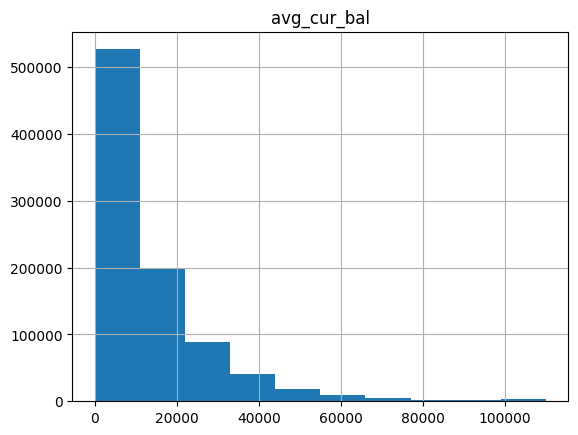

>>> Current breaks:
1000.0,6500.0,15000.0,22500.0,31500.0,49500.0 



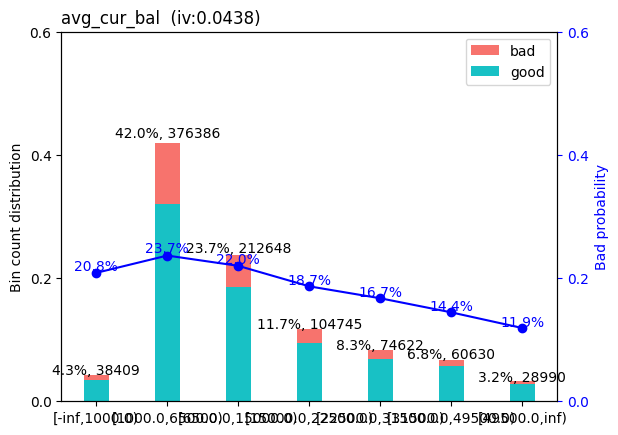

>>> Adjust breaks for (1/35) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 6500.0,15000.0,22500.0,31500.0,49500.0
[INFO] creating woe binning ...
>>> Current breaks:
15000.0, 6500.0, 31500.0, 49500.0, 22500.0 



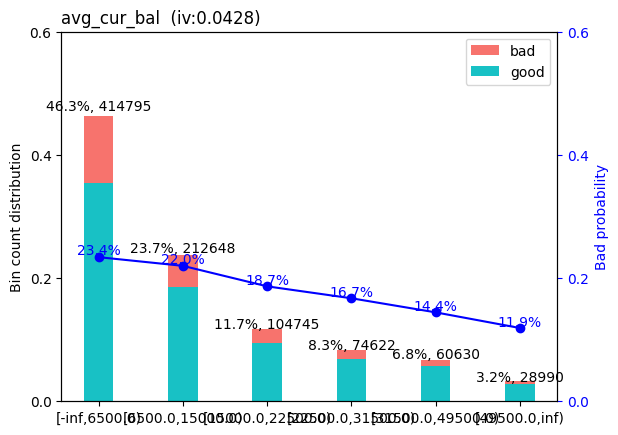

>>> Adjust breaks for (1/35) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/35 mths_since_recent_inq --------
>>> dt[mths_since_recent_inq].describe(): 
count    896430.000000
mean          5.925998
std           6.141089
min          -1.000000
25%           1.000000
50%           4.000000
75%          10.000000
max          25.000000
Name: mths_since_recent_inq, dtype: float64 



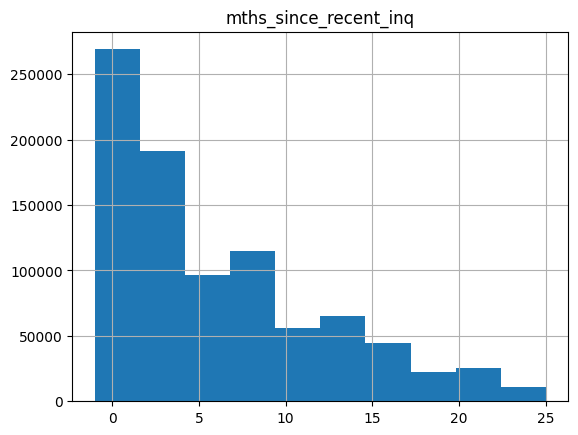

>>> Current breaks:
0.0,2.0,4.0,5.0,9.0,13.0 



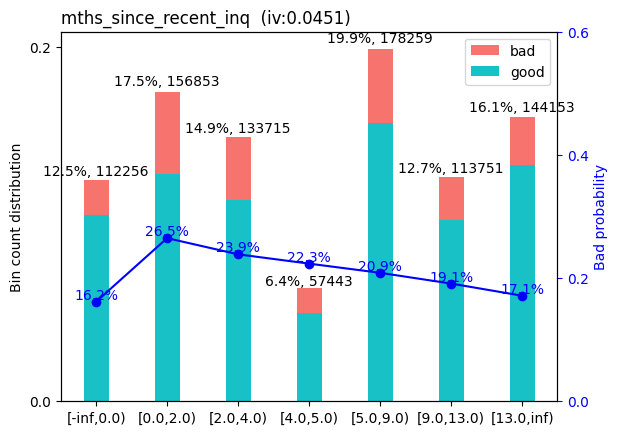

>>> Adjust breaks for (2/35) mths_since_recent_inq?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/35 bc_open_to_buy --------
>>> dt[bc_open_to_buy].describe(): 
count    896430.000000
mean      10901.771695
std       15179.651272
min           0.000000
25%        1722.000000
50%        5522.000000
75%       13117.000000
max      110000.000000
Name: bc_open_to_buy, dtype: float64 



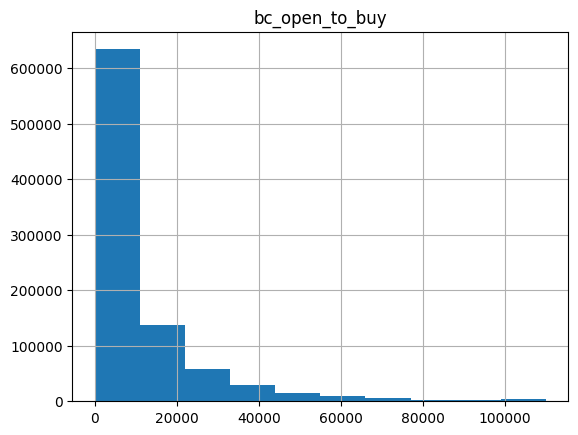

>>> Current breaks:
3000.0,11000.0,17500.0,29000.0 



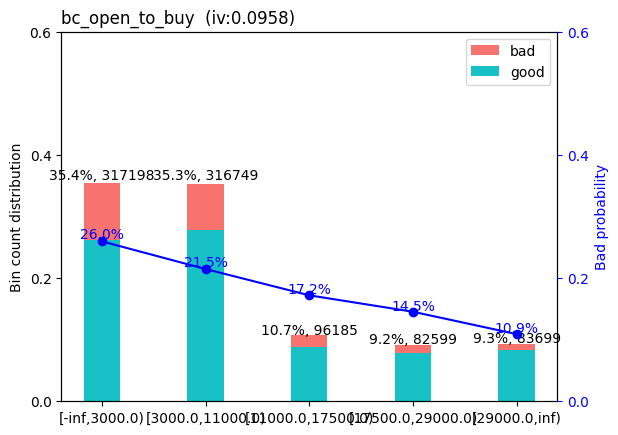

>>> Adjust breaks for (3/35) bc_open_to_buy?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/35 num_rev_tl_bal_gt_0 --------
>>> dt[num_rev_tl_bal_gt_0].describe(): 
count    896430.000000
mean          5.627660
std           3.260172
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          30.000000
Name: num_rev_tl_bal_gt_0, dtype: float64 



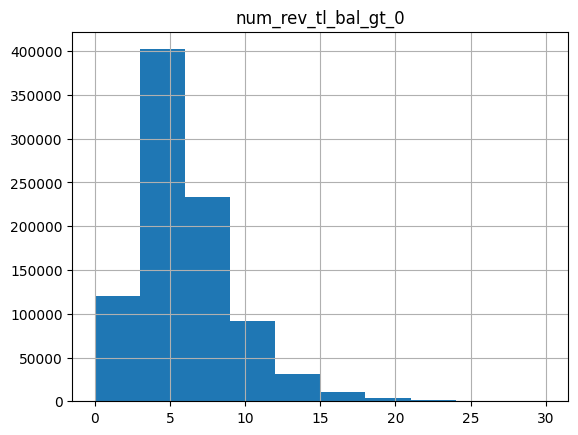

>>> Current breaks:
3.0,4.0,5.0,8.0,11.0 



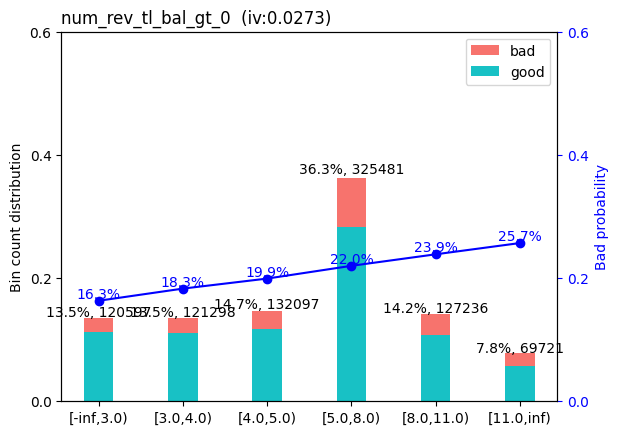

>>> Adjust breaks for (4/35) num_rev_tl_bal_gt_0?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/35 collateral_coverage_ratio --------
>>> dt[collateral_coverage_ratio].describe(): 
count    896430.000000
mean          4.021924
std           5.559213
min           0.000000
25%           1.092057
50%           2.510375
75%           4.632858
max          50.000000
Name: collateral_coverage_ratio, dtype: float64 



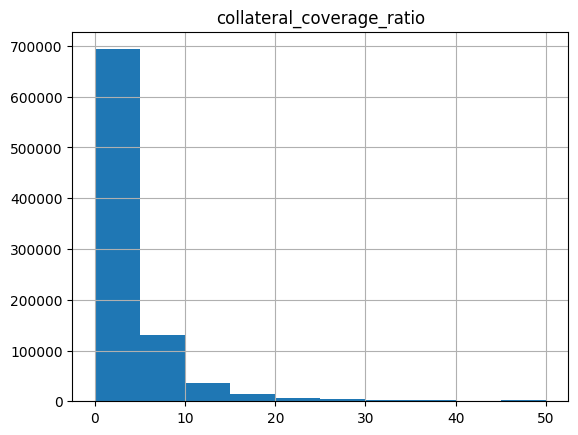

>>> Current breaks:
0.2,2.8000000000000003,4.0,4.2,5.4,8.6,13.8 



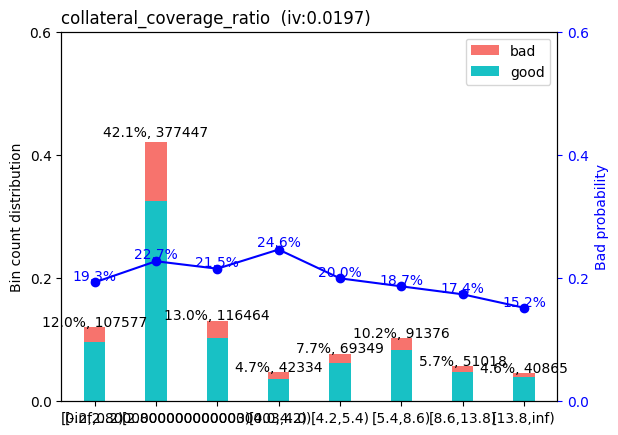

>>> Adjust breaks for (5/35) collateral_coverage_ratio?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/35 pct_tl_nvr_dlq --------
>>> dt[pct_tl_nvr_dlq].describe(): 
count    896430.000000
mean         94.105765
std           8.734760
min          50.000000
25%          91.700000
50%          97.600000
75%         100.000000
max         100.000000
Name: pct_tl_nvr_dlq, dtype: float64 



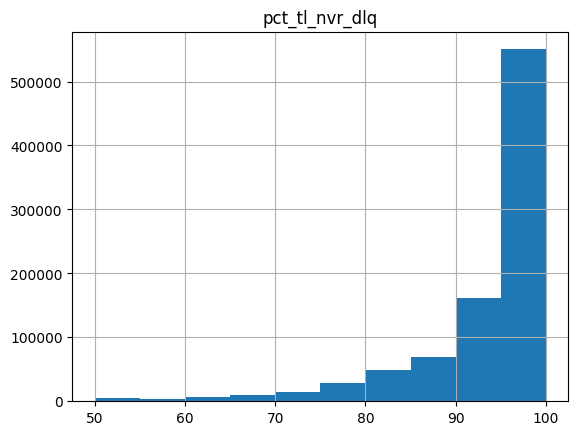

>>> Current breaks:
67.0,78.0,93.0,94.0,94.5,98.5 



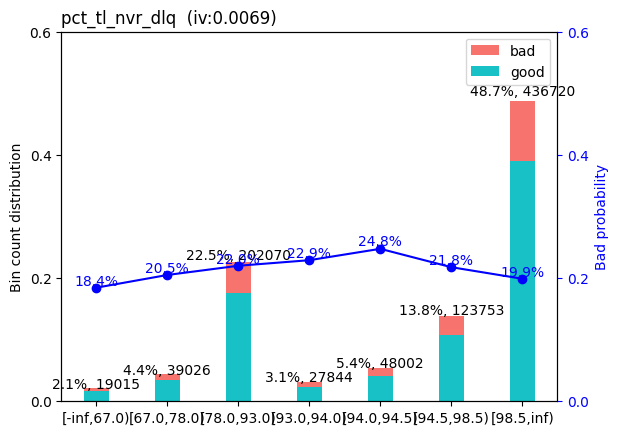

>>> Adjust breaks for (6/35) pct_tl_nvr_dlq?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/35 num_bc_sats --------
>>> dt[num_bc_sats].describe(): 
count    896430.000000
mean          4.765704
std           2.930633
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          19.000000
Name: num_bc_sats, dtype: float64 



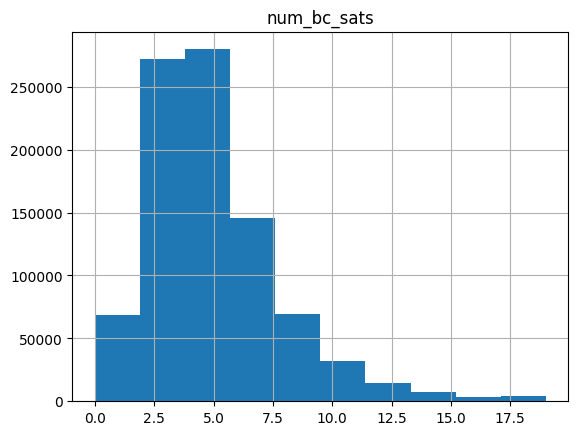

>>> Current breaks:
3.0,4.0,10.0,13.0 



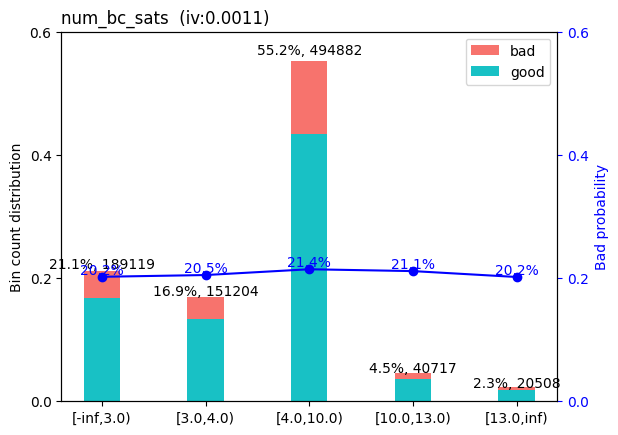

>>> Adjust breaks for (7/35) num_bc_sats?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/35 bc_util --------
>>> dt[bc_util].describe(): 
count    896430.000000
mean         58.513674
std          28.058125
min           0.000000
25%          37.100000
50%          59.500000
75%          83.000000
max         120.000000
Name: bc_util, dtype: float64 



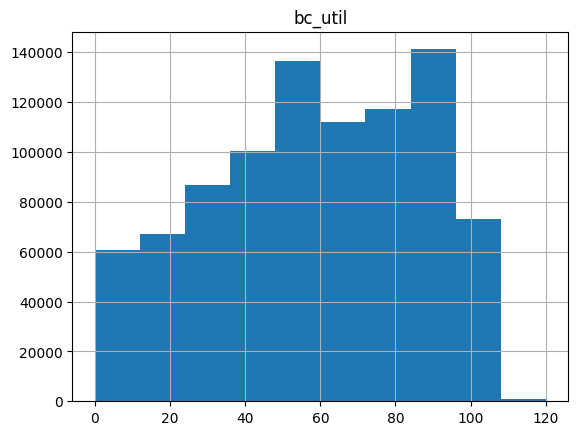

>>> Current breaks:
32.0,53.0,73.0,91.0,99.0 



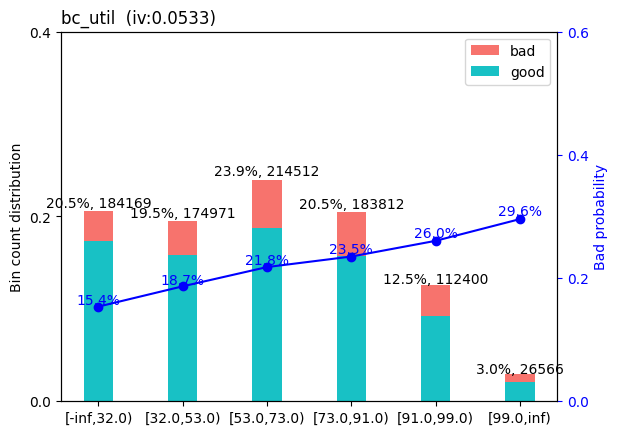

>>> Adjust breaks for (8/35) bc_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/35 acc_open_past_24mths --------
>>> dt[acc_open_past_24mths].describe(): 
count    896430.000000
mean          4.602855
std           3.117929
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          19.000000
Name: acc_open_past_24mths, dtype: float64 



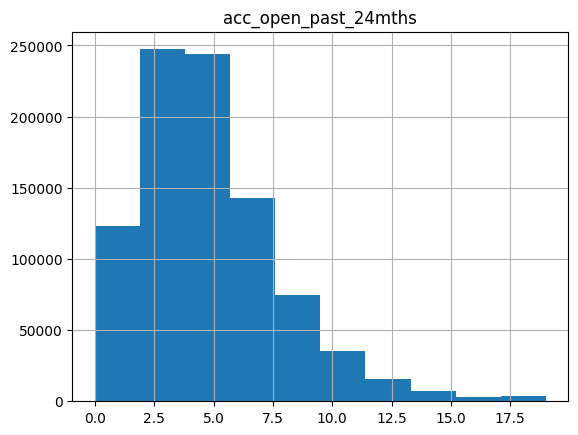

>>> Current breaks:
2.0,3.0,4.0,7.0,10.0 



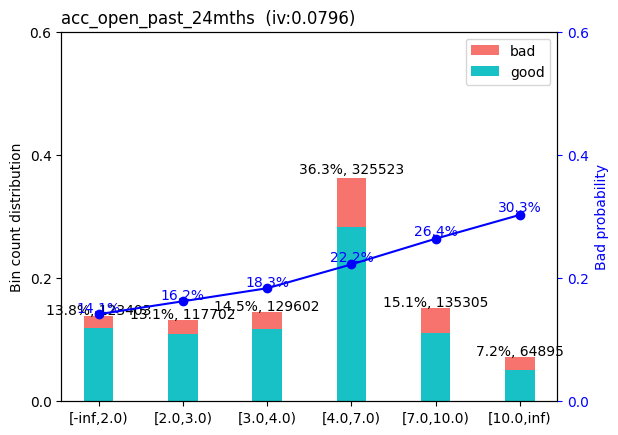

>>> Adjust breaks for (9/35) acc_open_past_24mths?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/35 total_il_high_credit_limit --------
>>> dt[total_il_high_credit_limit].describe(): 
count    896430.000000
mean      43505.762587
std       43275.525284
min           0.000000
25%       15473.000000
50%       33885.000000
75%       57435.000000
max      400000.000000
Name: total_il_high_credit_limit, dtype: float64 



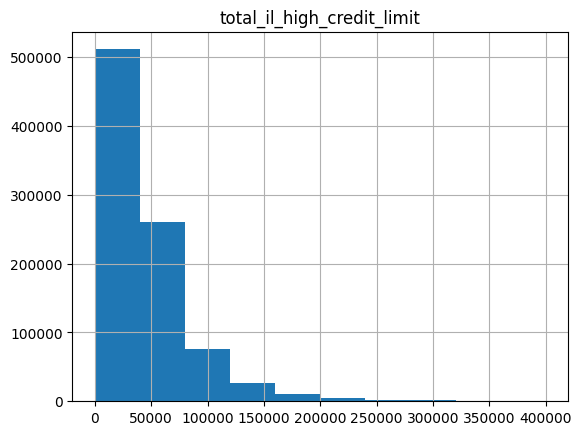

>>> Current breaks:
2000.0,10000.0,42000.0,44000.0,84000.0,132000.0 



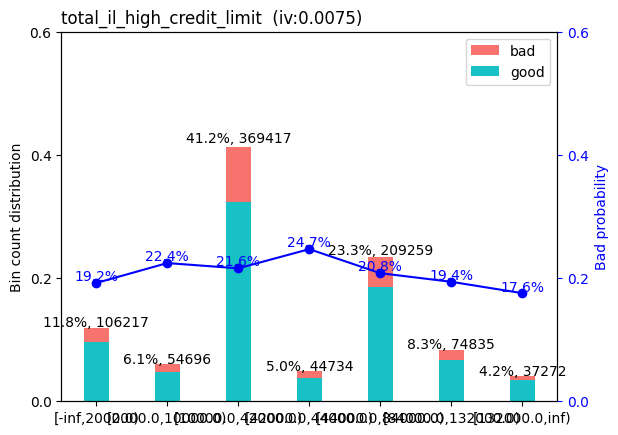

>>> Adjust breaks for (10/35) total_il_high_credit_limit?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/35 inq_last_12m --------
>>> dt[inq_last_12m].describe(): 
count    896430.000000
mean          0.854753
std           2.348482
min          -1.000000
25%          -1.000000
50%           0.000000
75%           2.000000
max          13.000000
Name: inq_last_12m, dtype: float64 



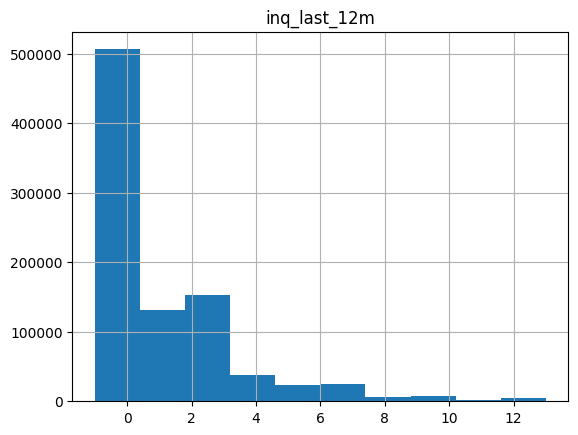

>>> Current breaks:
0.0,1.0,2.0,4.0,7.0 



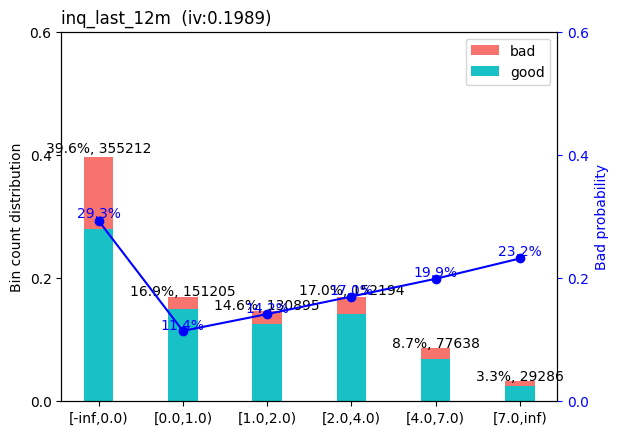

>>> Adjust breaks for (11/35) inq_last_12m?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/35 num_il_tl --------
>>> dt[num_il_tl].describe(): 
count    896430.000000
mean          8.419083
std           7.161039
min           0.000000
25%           4.000000
50%           7.000000
75%          11.000000
max          50.000000
Name: num_il_tl, dtype: float64 



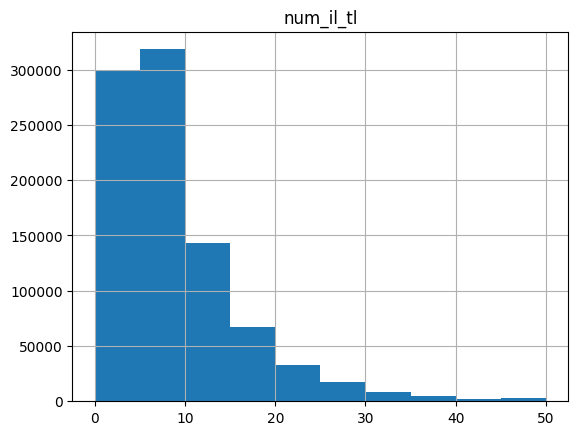

>>> Current breaks:
1.0,8.0,9.0,14.0,25.0 



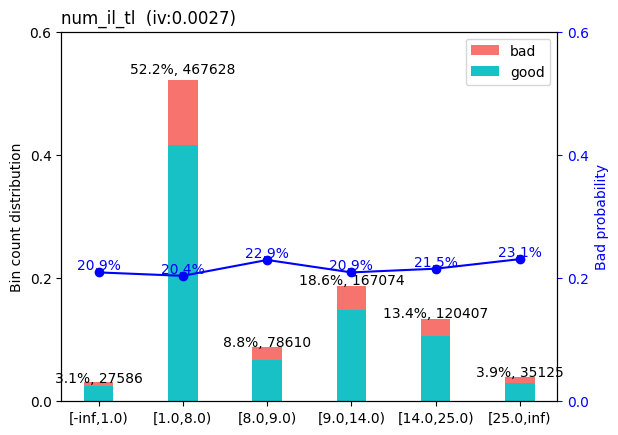

>>> Adjust breaks for (12/35) num_il_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/35 num_bc_tl --------
>>> dt[num_bc_tl].describe(): 
count    896430.000000
mean          7.733304
std           4.586311
min           0.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          30.000000
Name: num_bc_tl, dtype: float64 



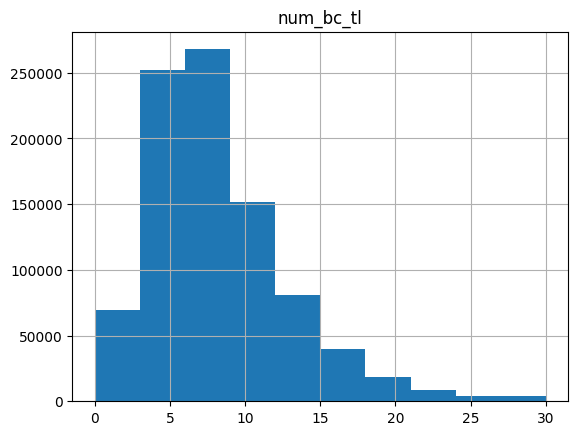

>>> Current breaks:
5.0,7.0,8.0,9.0,13.0,19.0 



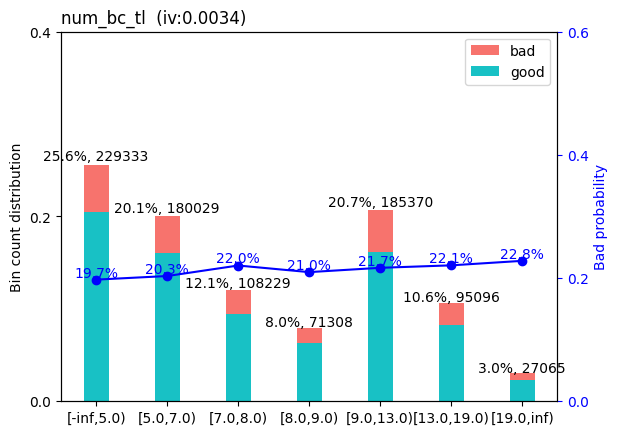

>>> Adjust breaks for (13/35) num_bc_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/35 num_rev_accts --------
>>> dt[num_rev_accts].describe(): 
count    896430.000000
mean         14.052401
std           7.905395
min           0.000000
25%           8.000000
50%          13.000000
75%          18.000000
max          60.000000
Name: num_rev_accts, dtype: float64 



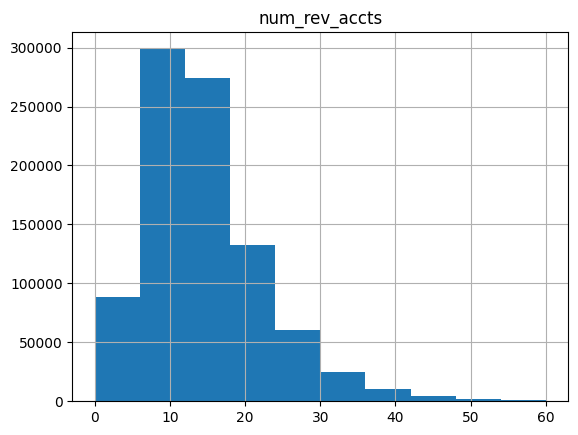

>>> Current breaks:
4.0,7.0,13.0,14.0,15.0,20.0 



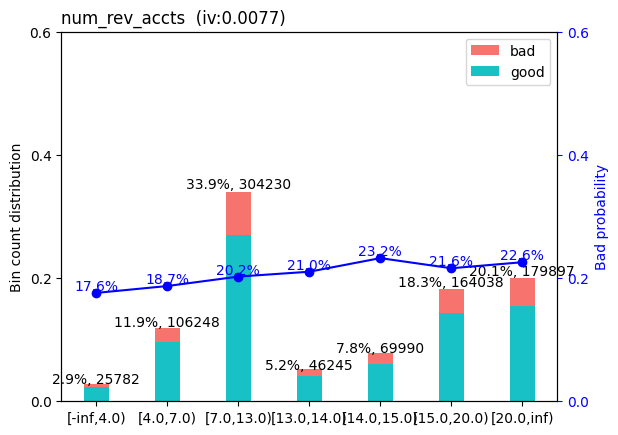

>>> Adjust breaks for (14/35) num_rev_accts?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/35 pub_rec_bankruptcies --------
>>> dt[pub_rec_bankruptcies].describe(): 
count    896430.000000
mean          0.128616
std           0.352823
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: pub_rec_bankruptcies, dtype: float64 

>>> dt[pub_rec_bankruptcies].value_counts(): 
0.000000    786474
1.000000    104103
2.000000      5578
0.130561       275
Name: pub_rec_bankruptcies, dtype: int64 

>>> Current breaks:
0.1305611194492024 



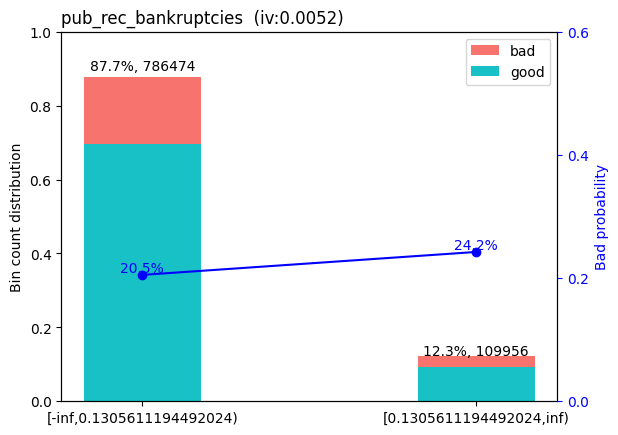

>>> Adjust breaks for (15/35) pub_rec_bankruptcies?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/35 mths_since_recent_revol_delinq --------
>>> dt[mths_since_recent_revol_delinq].describe(): 
count    896430.000000
mean         11.112154
std          21.367251
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          17.000000
max          80.000000
Name: mths_since_recent_revol_delinq, dtype: float64 



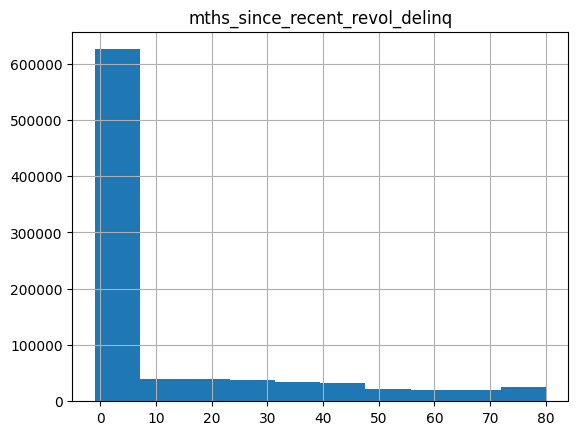

>>> Current breaks:
0.0,9.0,16.0,33.0,54.0 



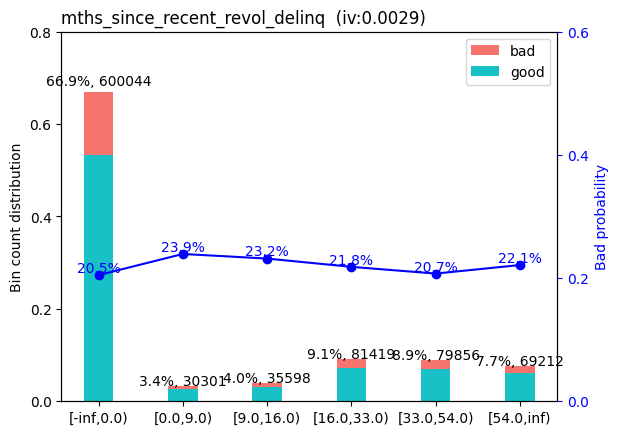

>>> Adjust breaks for (16/35) mths_since_recent_revol_delinq?
1: next 
2: yes 
3: back
Selection: 1
-------- 17/35 percent_bc_gt_75 --------
>>> dt[percent_bc_gt_75].describe(): 
count    896430.000000
mean         43.236004
std          35.674988
min           0.000000
25%           0.000000
50%          40.000000
75%          71.400000
max         100.000000
Name: percent_bc_gt_75, dtype: float64 



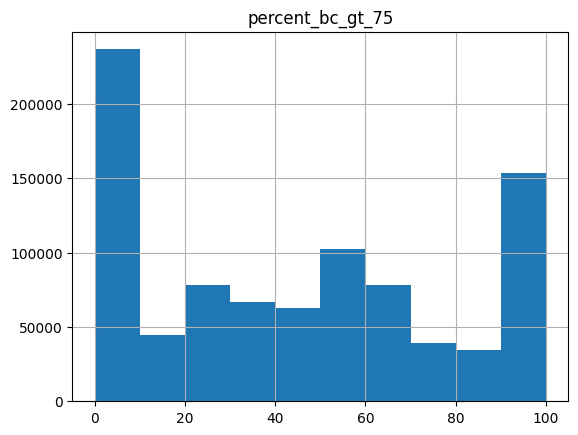

>>> Current breaks:
11.0,26.0,34.0,51.0 



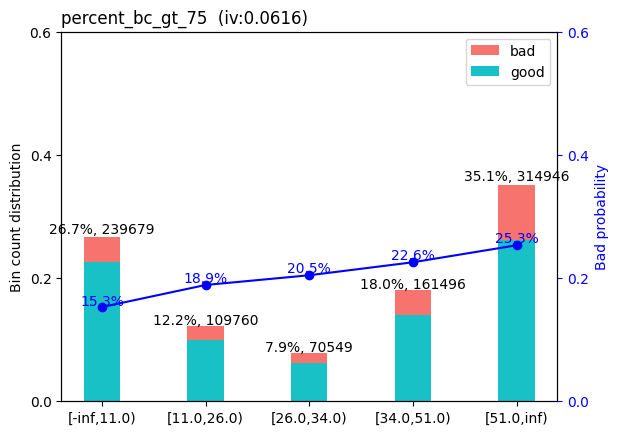

>>> Adjust breaks for (17/35) percent_bc_gt_75?
1: next 
2: yes 
3: back
Selection: 1
-------- 18/35 num_op_rev_tl --------
>>> dt[num_op_rev_tl].describe(): 
count    896430.000000
mean          8.277420
std           4.586311
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          35.000000
Name: num_op_rev_tl, dtype: float64 



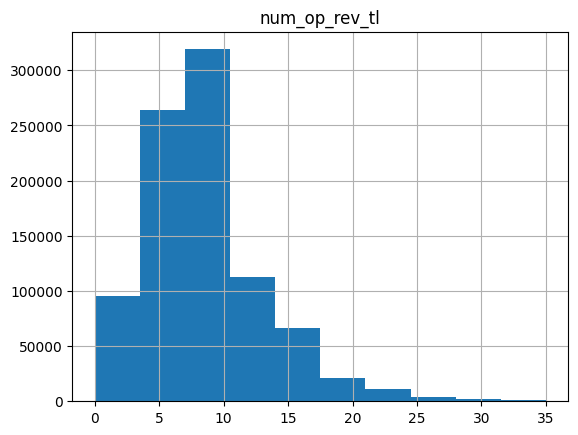

>>> Current breaks:
3.0,5.0,7.0,8.0,9.0 



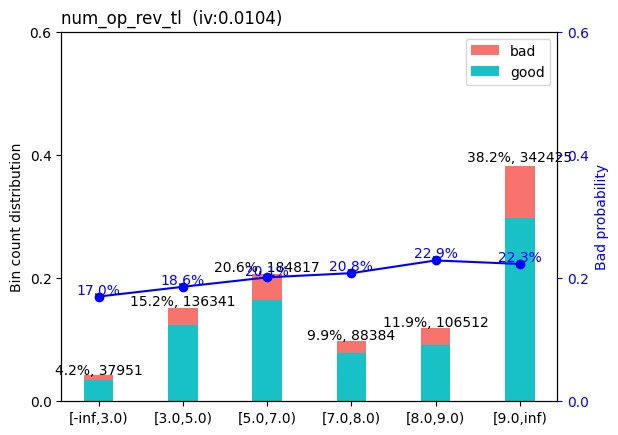

>>> Adjust breaks for (18/35) num_op_rev_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 19/35 mo_sin_old_rev_tl_op --------
>>> dt[mo_sin_old_rev_tl_op].describe(): 
count    896430.000000
mean        174.893957
std         100.289967
min          -1.000000
25%         110.000000
50%         159.000000
75%         228.000000
max         901.000000
Name: mo_sin_old_rev_tl_op, dtype: float64 



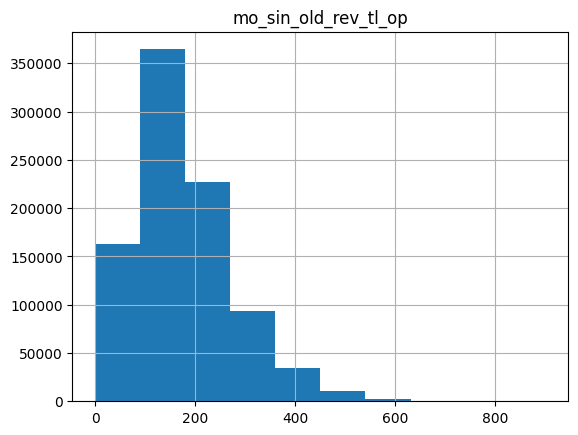

>>> Current breaks:
30.0,90.0,120.0,130.0,190.0,210.0,255.0 



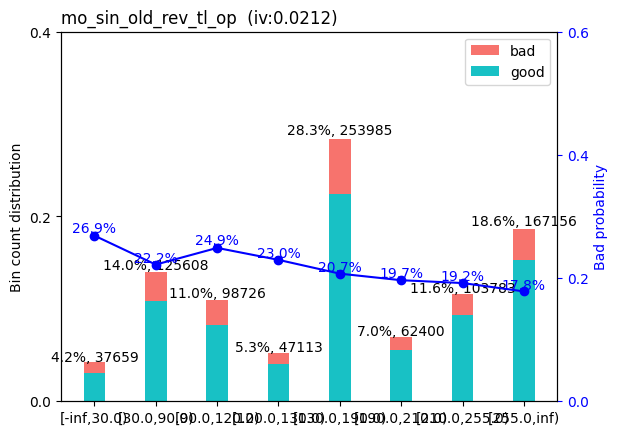

>>> Adjust breaks for (19/35) mo_sin_old_rev_tl_op?
1: next 
2: yes 
3: back
Selection: 1
-------- 20/35 num_actv_bc_tl --------
>>> dt[num_actv_bc_tl].describe(): 
count    896430.000000
mean          3.687897
std           2.268129
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          15.000000
Name: num_actv_bc_tl, dtype: float64 



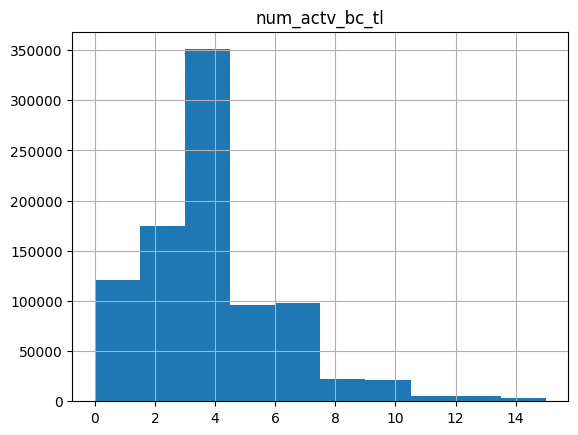

>>> Current breaks:
3.0,5.0,7.0 



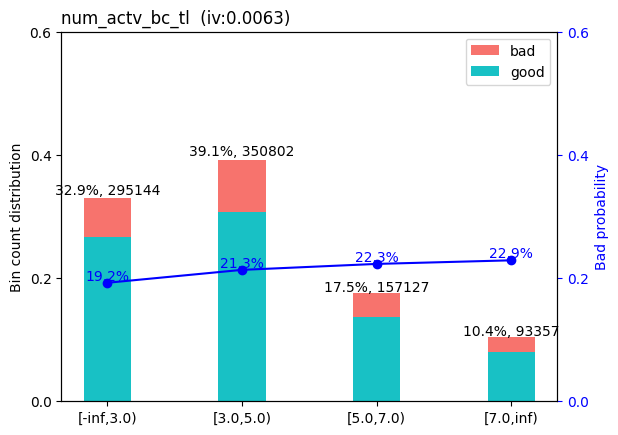

>>> Adjust breaks for (20/35) num_actv_bc_tl?
1: next 
2: yes 
3: back
Selection: 11


/usr/local/lib/python3.9/dist-packages/scorecardpy/woebin.py:1467: UserWarning: Enter an item from the menu, or 0 to exit.
  warnings.warn('Enter an item from the menu, or 0 to exit.')


Selection: 1
-------- 21/35 payment_history --------
>>> dt[payment_history].describe(): 
count    896430.000000
mean          0.695135
std           0.172845
min          -0.300000
25%           0.609174
50%           0.722222
75%           0.818182
max           1.000000
Name: payment_history, dtype: float64 



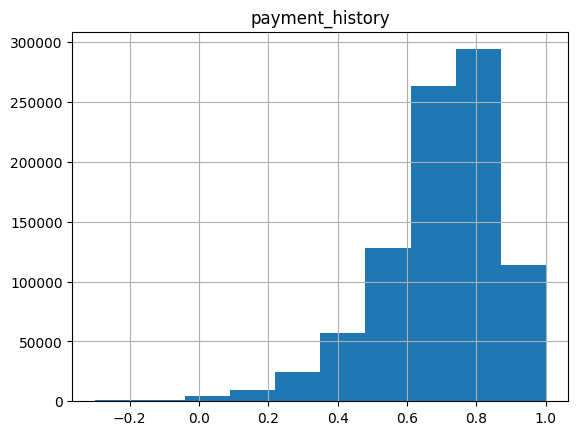

>>> Current breaks:
0.25,0.33999999999999997,0.69,0.7,0.85 



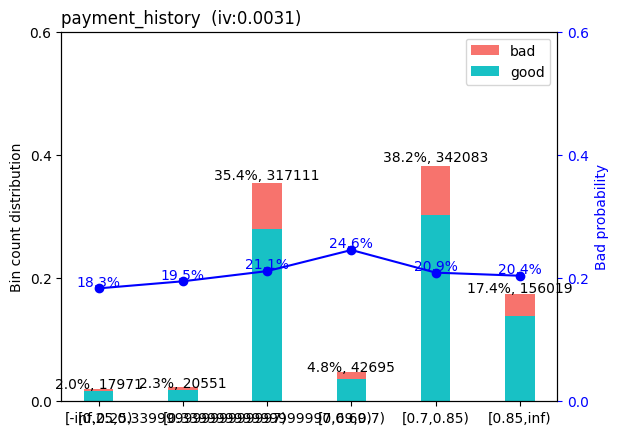

>>> Adjust breaks for (21/35) payment_history?
1: next 
2: yes 
3: back
Selection: 1
-------- 22/35 mo_sin_rcnt_rev_tl_op --------
>>> dt[mo_sin_rcnt_rev_tl_op].describe(): 
count    896430.000000
mean         13.176985
std          16.321591
min          -1.000000
25%           3.000000
50%           8.000000
75%          16.000000
max         110.000000
Name: mo_sin_rcnt_rev_tl_op, dtype: float64 



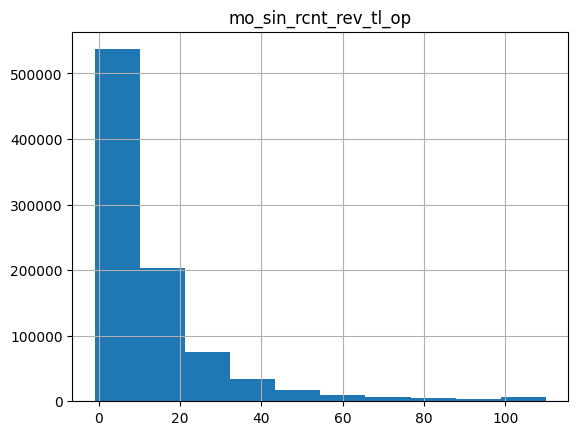

>>> Current breaks:
2.0,5.0,10.0,17.0,29.0 



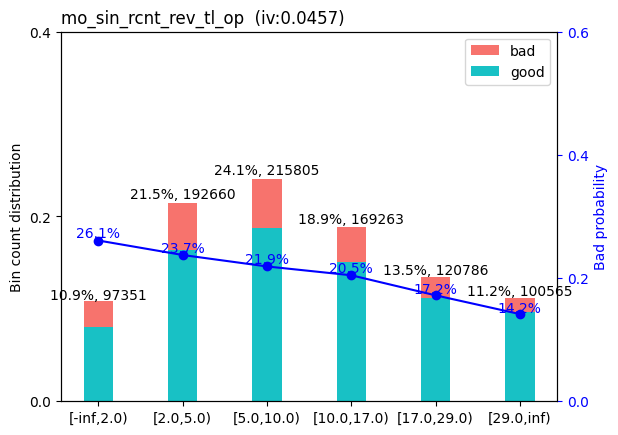

>>> Adjust breaks for (22/35) mo_sin_rcnt_rev_tl_op?
1: next 
2: yes 
3: back
Selection: 1
-------- 23/35 total_bal_ex_mort --------
>>> dt[total_bal_ex_mort].describe(): 
count    896430.000000
mean      50812.316237
std       48078.589447
min           0.000000
25%       21326.000000
50%       38670.000000
75%       63319.000000
max      600000.000000
Name: total_bal_ex_mort, dtype: float64 



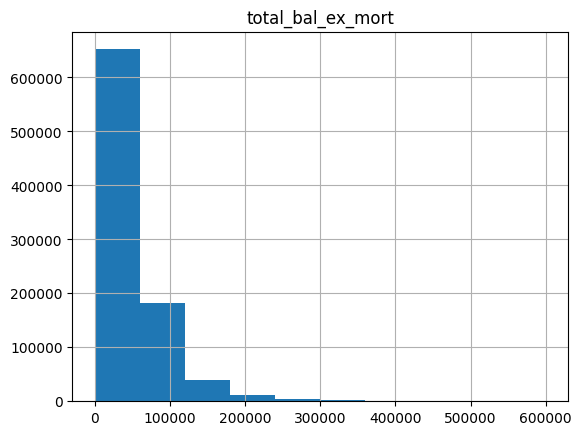

>>> Current breaks:
4000.0,8000.0,18000.0,42000.0,66000.0,102000.0,184000.0 



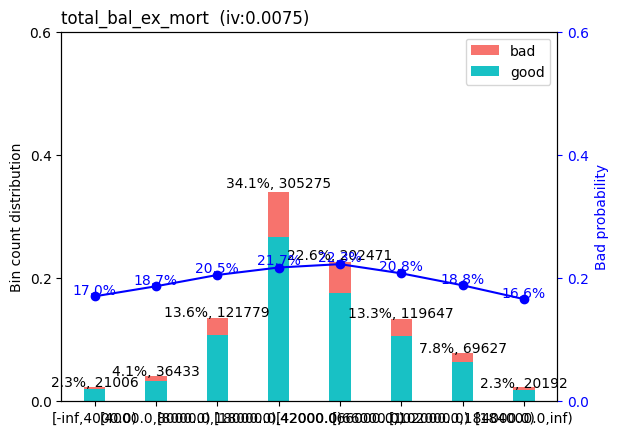

>>> Adjust breaks for (23/35) total_bal_ex_mort?
1: next 
2: yes 
3: back
Selection: 1
-------- 24/35 mo_sin_rcnt_tl --------
>>> dt[mo_sin_rcnt_tl].describe(): 
count    896430.000000
mean          7.776920
std           8.245355
min          -1.000000
25%           3.000000
50%           5.000000
75%          10.000000
max          60.000000
Name: mo_sin_rcnt_tl, dtype: float64 



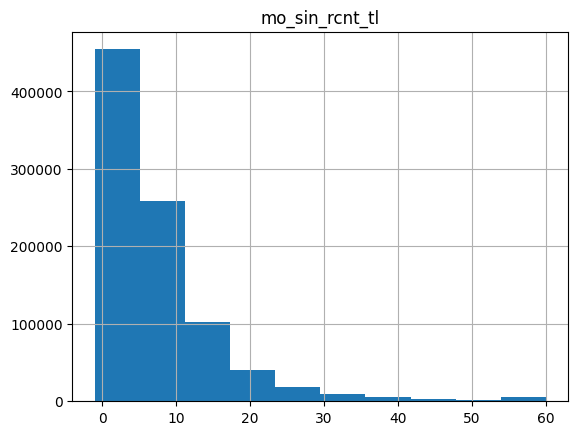

>>> Current breaks:
2.0,4.0,9.0,16.0 



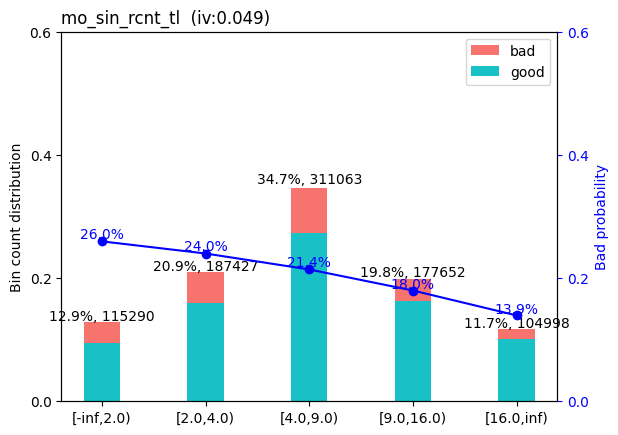

>>> Adjust breaks for (24/35) mo_sin_rcnt_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 25/35 num_accts_ever_120_pd --------
>>> dt[num_accts_ever_120_pd].describe(): 
count    896430.000000
mean          0.490239
std           1.189660
min           0.000000
25%           0.000000
50%           0.000000
75%           0.507000
max           8.000000
Name: num_accts_ever_120_pd, dtype: float64 



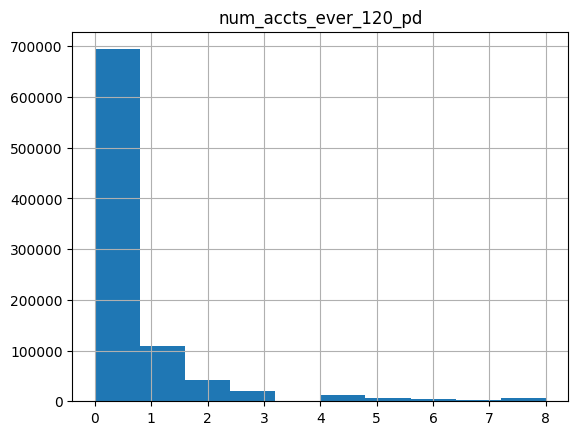

>>> Current breaks:
0.5070000264607788,1.0,2.0 



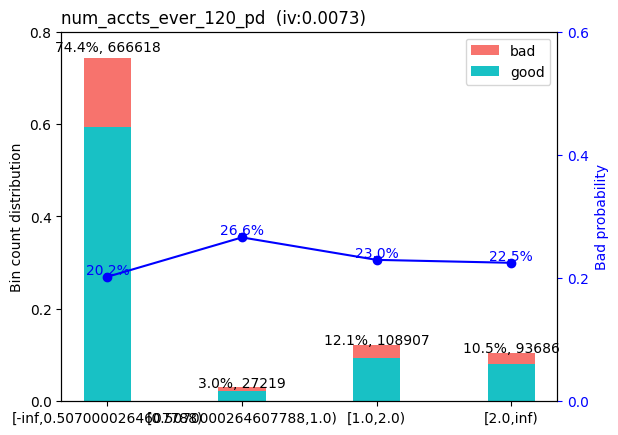

>>> Adjust breaks for (25/35) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
Selection: 1
-------- 26/35 tot_hi_cred_lim --------
>>> dt[tot_hi_cred_lim].describe(): 
count    8.964300e+05
mean     1.745371e+05
std      1.717286e+05
min      0.000000e+00
25%      5.113225e+04
50%      1.172845e+05
75%      2.471000e+05
max      1.800000e+06
Name: tot_hi_cred_lim, dtype: float64 



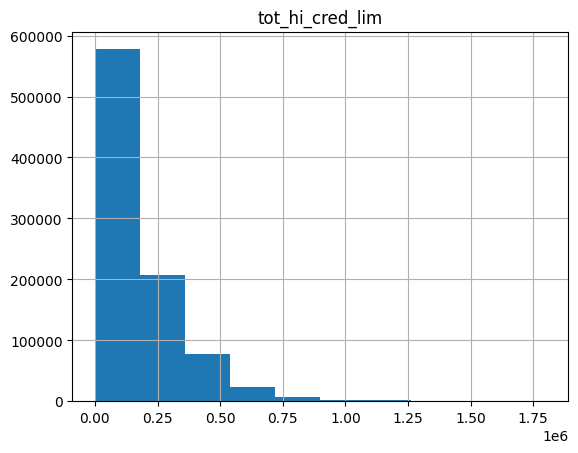

>>> Current breaks:
80000.0,180000.0,210000.0,280000.0,510000.0 



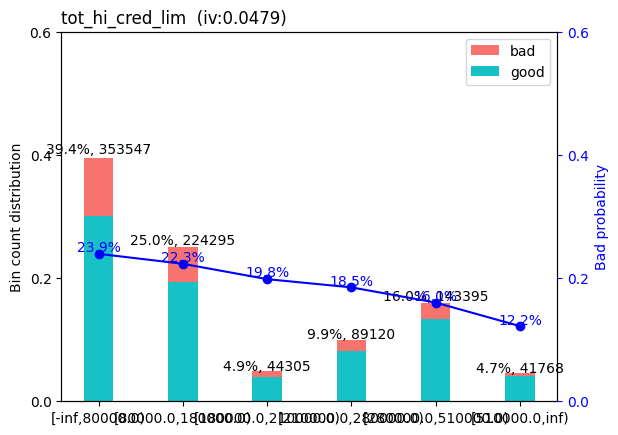

>>> Adjust breaks for (26/35) tot_hi_cred_lim?
1: next 
2: yes 
3: back
Selection: 1
-------- 27/35 tax_liens --------
>>> dt[tax_liens].describe(): 
count    896430.000000
mean          0.047889
std           0.350937
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: tax_liens, dtype: float64 



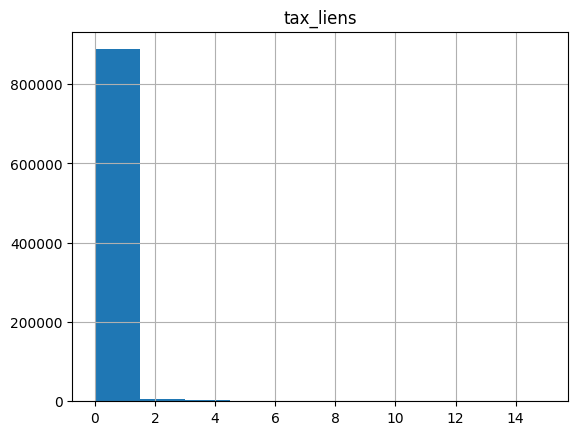

>>> Current breaks:
1.0 



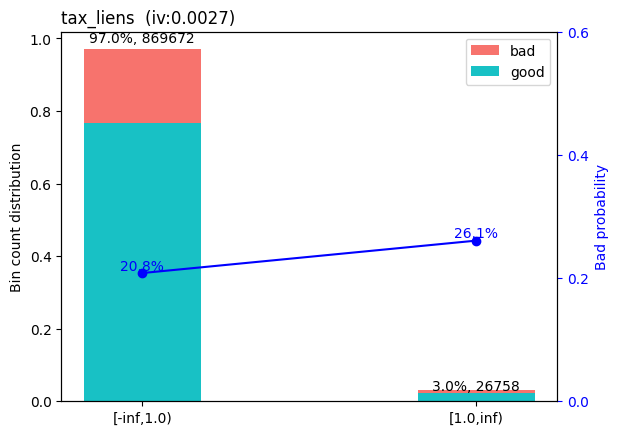

>>> Adjust breaks for (27/35) tax_liens?
1: next 
2: yes 
3: back
Selection: 1
-------- 28/35 bank_dlq --------
>>> dt[bank_dlq].describe(): 
count    896430.000000
mean          0.232721
std           0.422566
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: bank_dlq, dtype: float64 

>>> dt[bank_dlq].value_counts(): 
0    687812
1    208618
Name: bank_dlq, dtype: int64 

>>> Current breaks:
1.0 



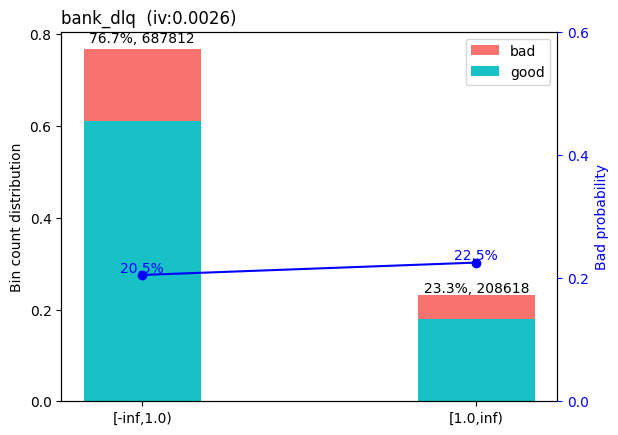

>>> Adjust breaks for (28/35) bank_dlq?
1: next 
2: yes 
3: back
Selection: 1
-------- 29/35 num_actv_rev_tl --------
>>> dt[num_actv_rev_tl].describe(): 
count    896430.000000
mean          5.674414
std           3.306844
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          22.000000
Name: num_actv_rev_tl, dtype: float64 



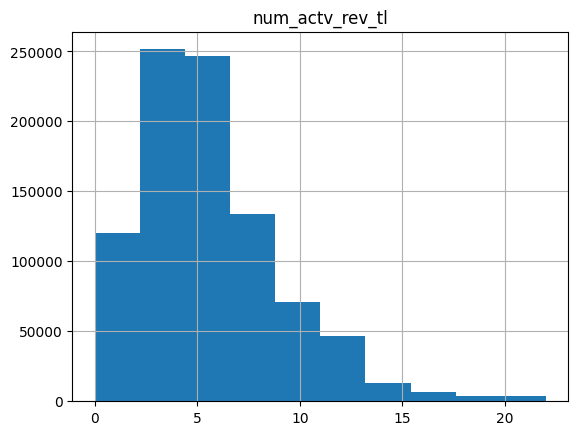

>>> Current breaks:
2.0,3.0,4.0,5.0,8.0,11.0 



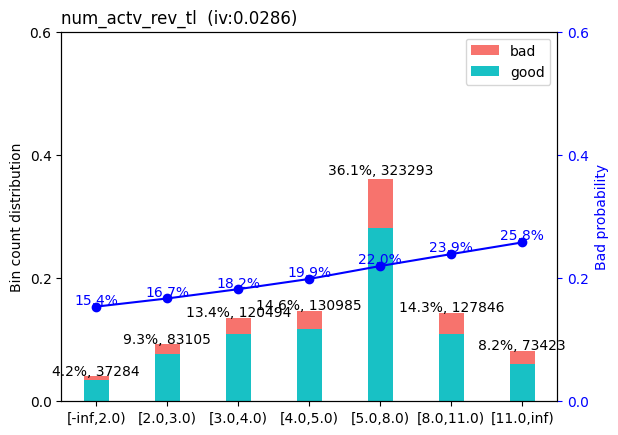

>>> Adjust breaks for (29/35) num_actv_rev_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 30/35 total_bc_limit --------
>>> dt[total_bc_limit].describe(): 
count    896430.000000
mean      22654.906614
std       22019.970388
min           0.000000
25%        8200.000000
50%       16300.000000
75%       29200.000000
max      200000.000000
Name: total_bc_limit, dtype: float64 



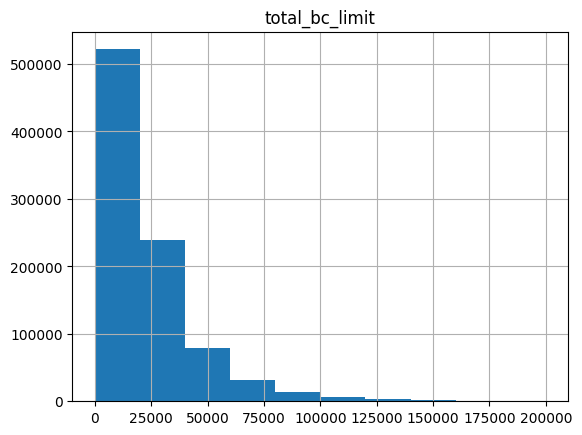

>>> Current breaks:
10000.0,14000.0,25000.0,49000.0 



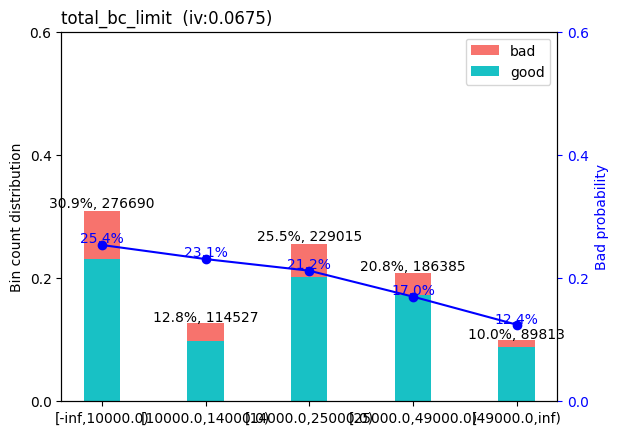

>>> Adjust breaks for (30/35) total_bc_limit?
1: next 
2: yes 
3: back
Selection: 1
-------- 31/35 il_acc --------
>>> dt[il_acc].describe(): 
count    896430.000000
mean          0.584594
std           0.492792
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: il_acc, dtype: float64 

>>> dt[il_acc].value_counts(): 
1    524048
0    372382
Name: il_acc, dtype: int64 

>>> Current breaks:
1.0 



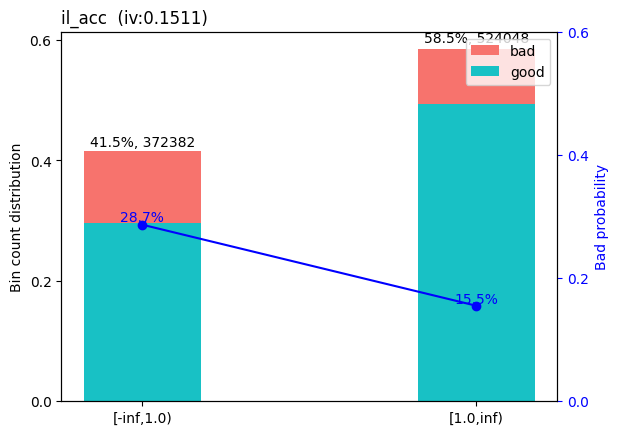

>>> Adjust breaks for (31/35) il_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 32/35 mort_acc --------
>>> dt[mort_acc].describe(): 
count    896430.000000
mean          1.527729
std           1.849471
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          11.000000
Name: mort_acc, dtype: float64 



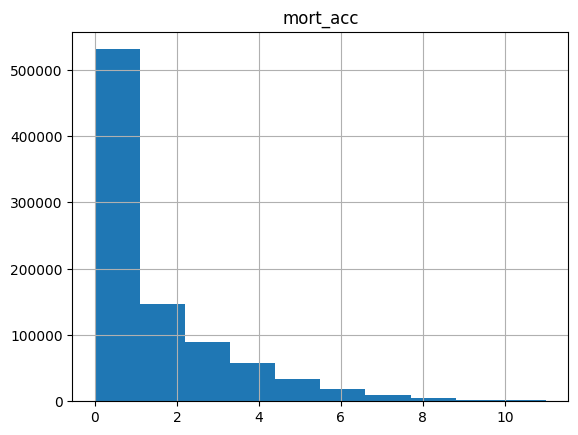

>>> Current breaks:
1.0,2.0,3.0 



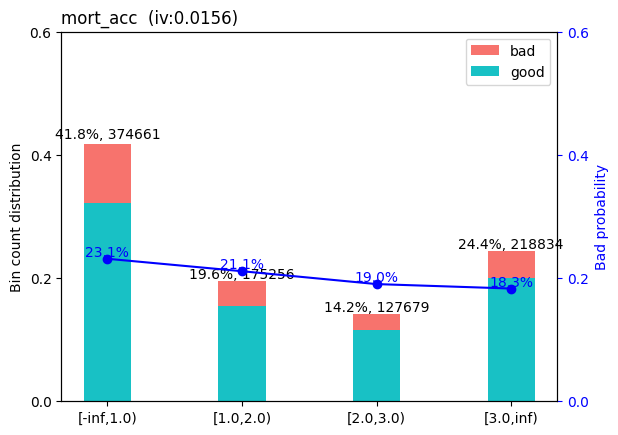

>>> Adjust breaks for (32/35) mort_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 33/35 mths_since_recent_bc --------
>>> dt[mths_since_recent_bc].describe(): 
count    896430.000000
mean         24.145579
std          29.505206
min           0.000000
25%           6.000000
50%          14.000000
75%          28.000000
max         190.000000
Name: mths_since_recent_bc, dtype: float64 



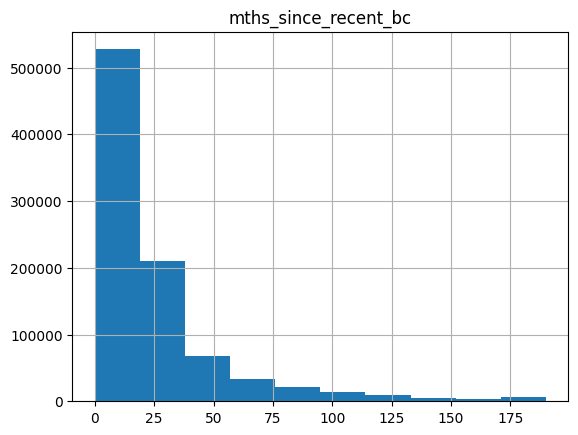

>>> Current breaks:
3.0,8.0,16.0,24.0,25.0,36.0,94.0 



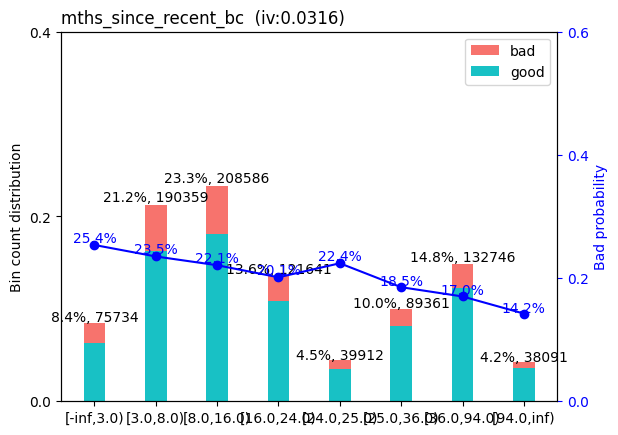

>>> Adjust breaks for (33/35) mths_since_recent_bc?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 3.0,8.0,16.0,25.0,36.0,94.0
[INFO] creating woe binning ...
Binning on 896430 rows and 2 columns in 00:00:11
>>> Current breaks:
16.0, 8.0, 3.0, 25.0, 94.0, 36.0 



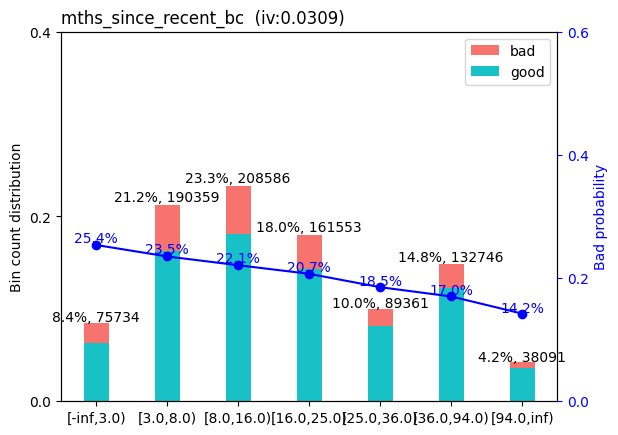

>>> Adjust breaks for (33/35) mths_since_recent_bc?
1: next 
2: yes 
3: back
Selection: 1
-------- 34/35 num_sats --------
>>> dt[num_sats].describe(): 
count    896430.000000
mean         11.652197
std           5.535518
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          40.000000
Name: num_sats, dtype: float64 



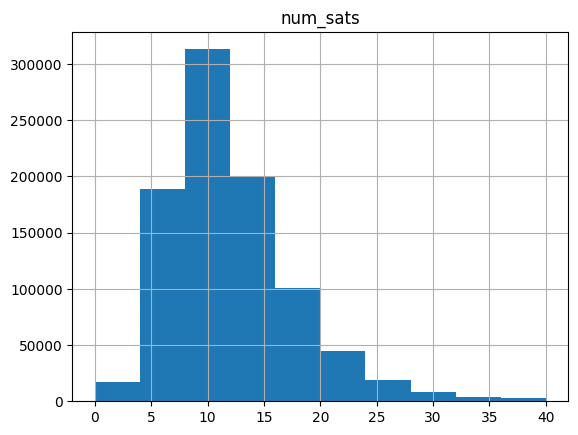

>>> Current breaks:
5.0,6.0,8.0,10.0,11.0,12.0 



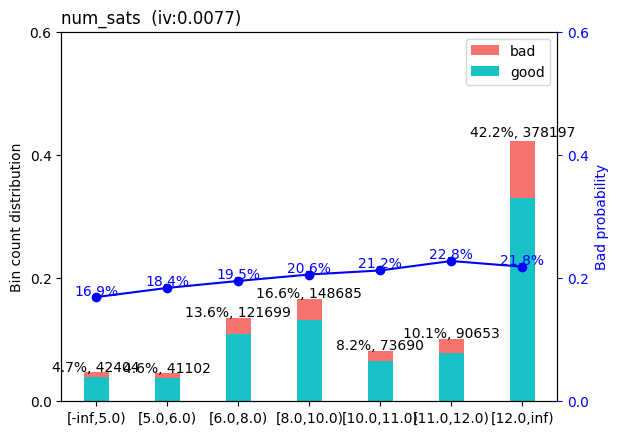

>>> Adjust breaks for (34/35) num_sats?
1: next 
2: yes 
3: back
Selection: 1
-------- 35/35 mo_sin_old_il_acct --------
>>> dt[mo_sin_old_il_acct].describe(): 
count    896430.000000
mean        117.632894
std          59.746039
min          -1.000000
25%          83.000000
50%         127.000000
75%         151.000000
max         350.000000
Name: mo_sin_old_il_acct, dtype: float64 



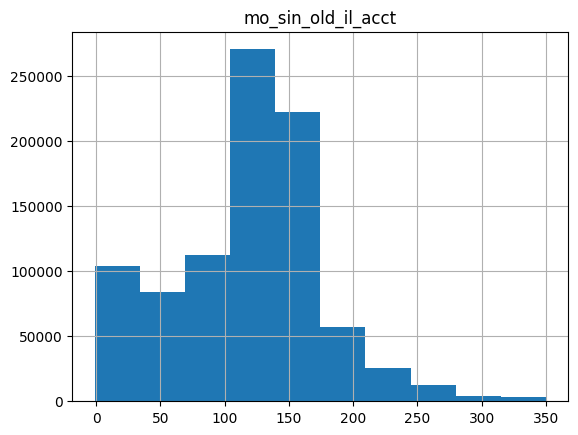

>>> Current breaks:
30.0,90.0,120.0,130.0,145.0,205.0 



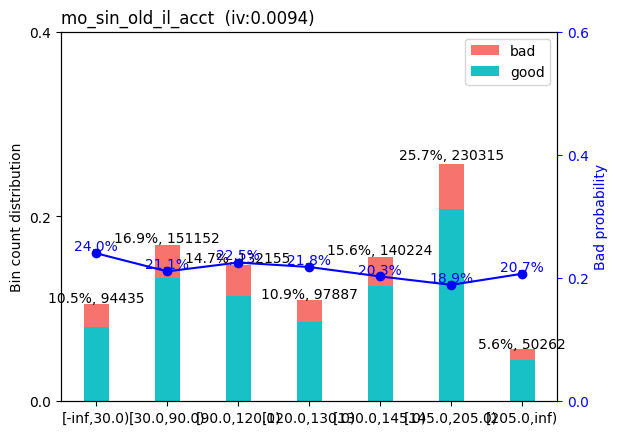

>>> Adjust breaks for (35/35) mo_sin_old_il_acct?
1: next 
2: yes 
3: back
Selection: 1


In [23]:
breaks_adj = sc.woebin_adj(after_outliers, "Default", bins, adj_all_var=True)


avg_cur_bal: 6500.0,15000.0,22500.0,31500.0,49500.0
mths_since_recent_bc: 3.0,8.0,16.0,25.0,36.0,94.0

In [34]:
print(breaks_adj)

{'acc_open_past_24mths': [2.0,3.0,4.0,7.0,10.0], 'avg_cur_bal': [6500.0,15000.0,22500.0,31500.0,49500.0], 'bank_dlq': [1.0], 'bc_open_to_buy': [3000.0,11000.0,17500.0,29000.0], 'bc_util': [32.0,53.0,73.0,91.0,99.0], 'collateral_coverage_ratio': [0.2,2.8000000000000003,4.0,4.2,5.4,8.6,13.8], 'il_acc': [1.0], 'inq_last_12m': [0.0,1.0,2.0,4.0,7.0], 'mo_sin_old_il_acct': [30.0,90.0,120.0,130.0,145.0,205.0], 'mo_sin_old_rev_tl_op': [30.0,90.0,120.0,130.0,190.0,210.0,255.0], 'mo_sin_rcnt_rev_tl_op': [2.0,5.0,10.0,17.0,29.0], 'mo_sin_rcnt_tl': [2.0,4.0,9.0,16.0], 'mort_acc': [1.0,2.0,3.0], 'mths_since_recent_bc': [3.0,8.0,16.0,25.0,36.0,94.0], 'mths_since_recent_inq': [0.0,2.0,4.0,5.0,9.0,13.0], 'mths_since_recent_revol_delinq': [0.0,9.0,16.0,33.0,54.0], 'num_accts_ever_120_pd': [0.5070000264607788,1.0,2.0], 'num_actv_bc_tl': [3.0,5.0,7.0], 'num_actv_rev_tl': [2.0,3.0,4.0,5.0,8.0,11.0], 'num_bc_sats': [3.0,4.0,10.0,13.0], 'num_bc_tl': [5.0,7.0,8.0,9.0,13.0,19.0], 'num_il_tl': [1.0,8.0,9.0,14.

In [33]:
{'all_util': [20], 'annual_inc_joint': [56000.0,66000.0,86000.0,126000.0], 'application_type': ['Joint App','Individual'], 'dti_joint': [0.2], 'il_util': [2], 'inq_fi': [0], 'max_bal_bc': [0.0,6000.0,10400.0], 'open_acc_6m': [0.0], 'open_act_il': [0,7], 'open_il_12m': [0], 'open_il_24m': [0], 'open_rv_12m': [0.0], 'open_rv_24m': [0], 'revol_util': [22.0,38.0,48.0,58.0], 'tot_coll_amt': [40, 210], 'tot_cur_bal': [100000,140000,200000,300000,430000], 'total_acc': [9.0,13.0,23.0,29.0,33.0,44.0], 'total_bal_il': [2000.0, 60000.0], 'total_cu_tl': [0.0]}

{'all_util': [20],
 'annual_inc_joint': [56000.0, 66000.0, 86000.0, 126000.0],
 'application_type': ['Joint App', 'Individual'],
 'dti_joint': [0.2],
 'il_util': [2],
 'inq_fi': [0],
 'max_bal_bc': [0.0, 6000.0, 10400.0],
 'open_acc_6m': [0.0],
 'open_act_il': [0, 7],
 'open_il_12m': [0],
 'open_il_24m': [0],
 'open_rv_12m': [0.0],
 'open_rv_24m': [0],
 'revol_util': [22.0, 38.0, 48.0, 58.0],
 'tot_coll_amt': [40, 210],
 'tot_cur_bal': [100000, 140000, 200000, 300000, 430000],
 'total_acc': [9.0, 13.0, 23.0, 29.0, 33.0, 44.0],
 'total_bal_il': [2000.0, 60000.0],
 'total_cu_tl': [0.0]}

In [18]:
# cred_bins = sc.woebin(after_outliers[['total_il_hi_credit_limit', 'Default']], y = 'Default', 
#                 min_perc_fine_bin=0.01, # How many bins to cut initially into
#                 min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
#                 stop_limit=0.02, # Minimum information value 
#                 max_num_bin=10, # Maximum number of bins
#                 method='tree'
#                 )

In [19]:
# charge_off_bins_adj = sc.woebin(after_outliers[['chargeoff_within_12_mths', 'Default']], y="Default", breaks_list=[1.0])
# sc.woebin_plot(charge_off_bins_adj)

In [24]:
# breaks_adj = sc.woebin_adj(after_outliers[['chargeoff_within_12_mths', 'Default']], "Default", breaks_list = [0.0])

good_iv = ['percent_bc_gt_75','bc_open_to_buy', 'mo_sin_old_rev_tl_op','num_rev_tl_bal_gt_0','total_bc_limit','avg_cur_bal','mo_sin_rcnt_rev_tl_op','mths_since_recent_inq','il_acc','tot_hi_cred_lim','mo_sin_rcnt_tl','bc_util','inq_last_12m','acc_open_past_24mths','mths_since_recent_bc','num_actv_rev_tl']

useful_features = after_outliers[good_iv]

KeyboardInterrupt: ignored

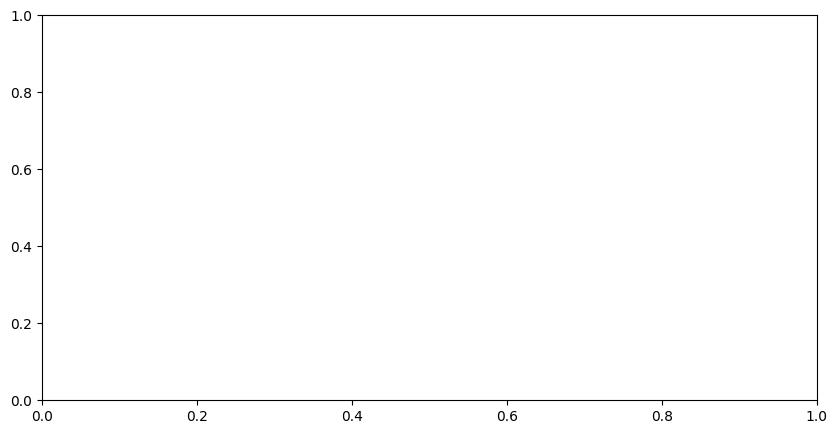

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(useful_features), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [ ]:
from scipy.stats import zscore
train_last_19_norm = useful_features.apply(zscore)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(train_last_19_norm), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [25]:
import ast
# json.loads(breaks_adj)
breaks_adj_dict = ast.literal_eval(breaks_adj)

breaks_adj_dict = {k:breaks_adj_dict[k] for k in good_iv}

In [26]:
useful_features['Default'] = after_outliers['Default']

<ipython-input-26-b60fcc170af7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_features['Default'] = after_outliers['Default']


# Vishal's Features

In [28]:
{'delinq_2yrs': [1.0,2.0], 'dti': [9.0,12.5,18.0,24.5], 'fico_range_high': [680.0,705.0,720.0,740.0,765.0], 'fico_range_low': [680.0,705.0,720.0,740.0,765.0], 'home_ownership': ['ANY%,%MORTGAGE','OWN','RENT%,%NONE%,%OTHER'], 'inq_last_6mths': [1.0,2.0], 'installment': [160.0,260.0,300.0,340.0,500.0,600.0,660.0], 'loan_amnt': [4500.0,10500.0,16500.0,20000.0,20500.0,25000.0,35000.0], 'open_acc': [6.0,8.0,10.0,11.0], 'pub_rec': [1.0], 'purpose': ['car%,%credit_card','home_improvement%,%major_purchase','house%,%vacation%,%other','wedding%,%medical%,%debt_consolidation%,%moving%,%renewable_energy%,%small_business%,%educational'], 'revol_bal': [2000.0,4000.0,22500.0,26500.0,36000.0], 'revol_util': [22.0,38.0,48.0,58.0], 'term': [' 36 months',' 60 months'], 'total_acc': [9.0,13.0,23.0,29.0,33.0,44.0]}

{'delinq_2yrs': [1.0, 2.0],
 'dti': [9.0, 12.5, 18.0, 24.5],
 'fico_range_high': [680.0, 705.0, 720.0, 740.0, 765.0],
 'fico_range_low': [680.0, 705.0, 720.0, 740.0, 765.0],
 'home_ownership': ['ANY%,%MORTGAGE', 'OWN', 'RENT%,%NONE%,%OTHER'],
 'inq_last_6mths': [1.0, 2.0],
 'installment': [160.0, 260.0, 300.0, 340.0, 500.0, 600.0, 660.0],
 'loan_amnt': [4500.0, 10500.0, 16500.0, 20000.0, 20500.0, 25000.0, 35000.0],
 'open_acc': [6.0, 8.0, 10.0, 11.0],
 'pub_rec': [1.0],
 'purpose': ['car%,%credit_card',
  'home_improvement%,%major_purchase',
  'house%,%vacation%,%other',
  'wedding%,%medical%,%debt_consolidation%,%moving%,%renewable_energy%,%small_business%,%educational'],
 'revol_bal': [2000.0, 4000.0, 22500.0, 26500.0, 36000.0],
 'revol_util': [22.0, 38.0, 48.0, 58.0],
 'term': [' 36 months', ' 60 months'],
 'total_acc': [9.0, 13.0, 23.0, 29.0, 33.0, 44.0]}

In [ ]:
bins_adj = sc.woebin(useful_features, y="Default", breaks_list=breaks_adj_dict) # Apply new cuts
train_woe = sc.woebin_ply(useful_features, bins_adj) # Calculate WoE dataset (train)
# test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

In [ ]:
train_last_19_norm.total_il_high_credit_limit.describe()

In [ ]:
after_outliers.tax_liens.value_counts()

In [ ]:
sns.displot(data = after_outliers, x = 'total_il_high_credit_limit', hue = "Default", kind = 'kde')

In [ ]:
train_woe

In [ ]:
# Compute the correlation matrix
corr = train_woe.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

In [ ]:
corr